In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
  
pd.set_option('display.max_rows', 15)
np.random.seed(5)

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
bowler = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/bowlers_for_clustering.csv')

Mounted at /content/drive


In [3]:
bowler

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank
0,Shakib Al Hasan,BAN,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905,22.100,Best
1,TG Southee,NZ,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322,33.552,Good
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246,13.260,Best
3,SL Malinga,SL,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807,25.710,Best
4,Shahid Afridi,PAK,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701,27.006,Best
...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500,82.170,Poor
1081,JJ Tucker,BMUDA,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500,91.450,Poor
1082,CL White,AUS,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200,61.880,Poor
1083,Zahid Khan,SLE,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750,93.750,Poor


In [4]:
bowler_for_clustering = bowler.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
bowler_for_clustering

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905
1,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322
2,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246
3,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807
4,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701
...,...,...,...,...,...,...,...,...
1080,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500
1081,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500
1082,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200
1083,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750


# Formula Based Feature Scaling

In [5]:
bowler_for_clustering_scaled = bowler_for_clustering.copy()

In [6]:
bowler_for_clustering_scaled['average'] = ((np.max(bowler_for_clustering_scaled['average'])) - bowler_for_clustering_scaled['average']) / (np.max(bowler_for_clustering_scaled['average']) - np.min(bowler_for_clustering_scaled['average']))
bowler_for_clustering_scaled['strike_rate'] = ((np.max(bowler_for_clustering_scaled['strike_rate'])) - bowler_for_clustering_scaled['strike_rate']) / (np.max(bowler_for_clustering_scaled['strike_rate']) - np.min(bowler_for_clustering_scaled['strike_rate']))
bowler_for_clustering_scaled['economy'] = ((np.max(bowler_for_clustering_scaled['economy'])) - bowler_for_clustering_scaled['economy']) / (np.max(bowler_for_clustering_scaled['economy']) - np.min(bowler_for_clustering_scaled['economy']))
bowler_for_clustering_scaled['runs_index'] = ((np.max(bowler_for_clustering_scaled['runs_index'])) - bowler_for_clustering_scaled['runs_index']) / (np.max(bowler_for_clustering_scaled['runs_index']) - np.min(bowler_for_clustering_scaled['runs_index']))


bowler_for_clustering_scaled['balls_bolwed_per_innings'] = (bowler_for_clustering_scaled['balls_bolwed_per_innings'] - np.min(bowler_for_clustering_scaled['balls_bolwed_per_innings'])) / (np.max(bowler_for_clustering_scaled['balls_bolwed_per_innings']) - np.min(bowler_for_clustering_scaled['balls_bolwed_per_innings']))
bowler_for_clustering_scaled['wicket_index'] = (bowler_for_clustering_scaled['wicket_index'] - np.min(bowler_for_clustering_scaled['wicket_index'])) / (np.max(bowler_for_clustering_scaled['wicket_index']) - np.min(bowler_for_clustering_scaled['wicket_index']))
bowler_for_clustering_scaled['big_impact_index'] = (bowler_for_clustering_scaled['big_impact_index'] - np.min(bowler_for_clustering_scaled['big_impact_index'])) / (np.max(bowler_for_clustering_scaled['big_impact_index']) - np.min(bowler_for_clustering_scaled['big_impact_index']))
bowler_for_clustering_scaled['short_impact_index'] = (bowler_for_clustering_scaled['short_impact_index'] - np.min(bowler_for_clustering_scaled['short_impact_index'])) / (np.max(bowler_for_clustering_scaled['short_impact_index']) - np.min(bowler_for_clustering_scaled['short_impact_index']))


In [7]:
columns = bowler_for_clustering.columns.tolist()

In [8]:
bowler_for_clustering_scaled = pd.DataFrame(bowler_for_clustering_scaled,columns = columns )
bowler_for_clustering_scaled

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,0.927337,0.913447,0.686481,0.909833,0.480417,0.1575,0.469333,0.496182
1,0.901717,0.912674,0.540748,0.898167,0.472083,0.0550,0.515111,0.337093
2,0.964841,0.952859,0.739214,0.930056,0.702917,0.2450,0.670667,0.544905
3,0.922377,0.921175,0.614573,0.869500,0.495417,0.0900,0.516444,0.440323
4,0.902480,0.880216,0.690316,0.907889,0.379167,0.0775,0.406667,0.502173
...,...,...,...,...,...,...,...,...
1080,0.675933,0.641422,0.609779,0.375000,0.062500,0.0000,0.111111,0.743025
1081,0.697738,0.726430,0.477469,0.250000,0.062500,0.0000,0.111111,0.772394
1082,0.757700,0.726430,0.627996,0.133333,0.041667,0.0000,0.088889,0.928047
1083,0.626874,0.587326,0.606903,0.500000,0.062500,0.0000,0.111111,0.676946


In [9]:
data_scaled = bowler_for_clustering_scaled.copy()
data_scaled['name'] = bowler['name']
data_scaled['country'] = bowler['country']

cols = data_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


data_scaled = data_scaled [cols]
data_scaled

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,Shakib Al Hasan,BAN,0.927337,0.913447,0.686481,0.909833,0.480417,0.1575,0.469333,0.496182
1,TG Southee,NZ,0.901717,0.912674,0.540748,0.898167,0.472083,0.0550,0.515111,0.337093
2,Rashid Khan,AFG,0.964841,0.952859,0.739214,0.930056,0.702917,0.2450,0.670667,0.544905
3,SL Malinga,SL,0.922377,0.921175,0.614573,0.869500,0.495417,0.0900,0.516444,0.440323
4,Shahid Afridi,PAK,0.902480,0.880216,0.690316,0.907889,0.379167,0.0775,0.406667,0.502173
...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,0.675933,0.641422,0.609779,0.375000,0.062500,0.0000,0.111111,0.743025
1081,JJ Tucker,BMUDA,0.697738,0.726430,0.477469,0.250000,0.062500,0.0000,0.111111,0.772394
1082,CL White,AUS,0.757700,0.726430,0.627996,0.133333,0.041667,0.0000,0.088889,0.928047
1083,Zahid Khan,SLE,0.626874,0.587326,0.606903,0.500000,0.062500,0.0000,0.111111,0.676946


# K-Means Clustering

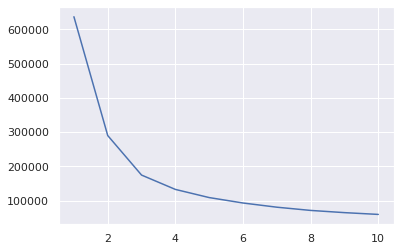

In [10]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(bowler_for_clustering)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7419608324754727
For n_clusters = 3 The average silhouette_score is : 0.5037514667521731
For n_clusters = 4 The average silhouette_score is : 0.35394619812074773
For n_clusters = 5 The average silhouette_score is : 0.33941729877202964
For n_clusters = 6 The average silhouette_score is : 0.2937039827815529
For n_clusters = 7 The average silhouette_score is : 0.29788831964621837
For n_clusters = 8 The average silhouette_score is : 0.2956955350019551
For n_clusters = 9 The average silhouette_score is : 0.28826508170263787
For n_clusters = 10 The average silhouette_score is : 0.2897275314239923


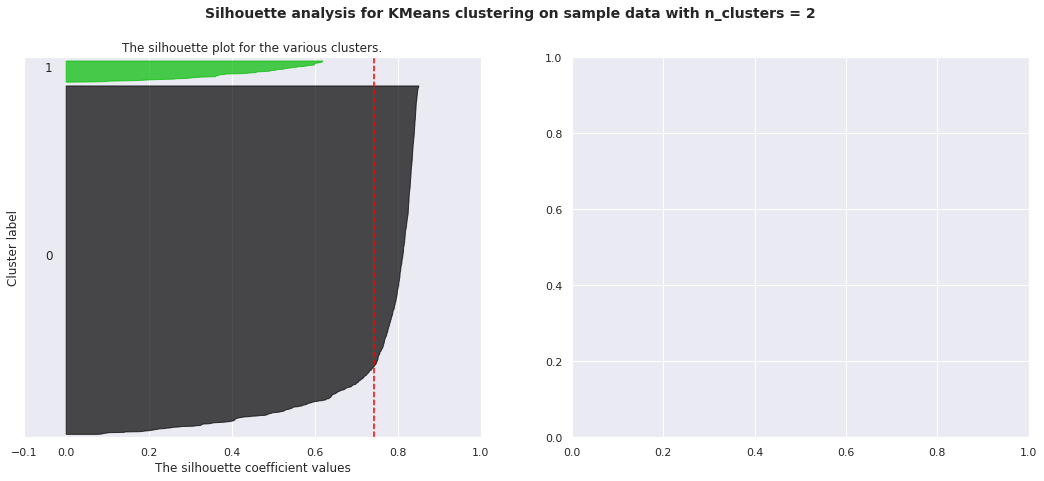

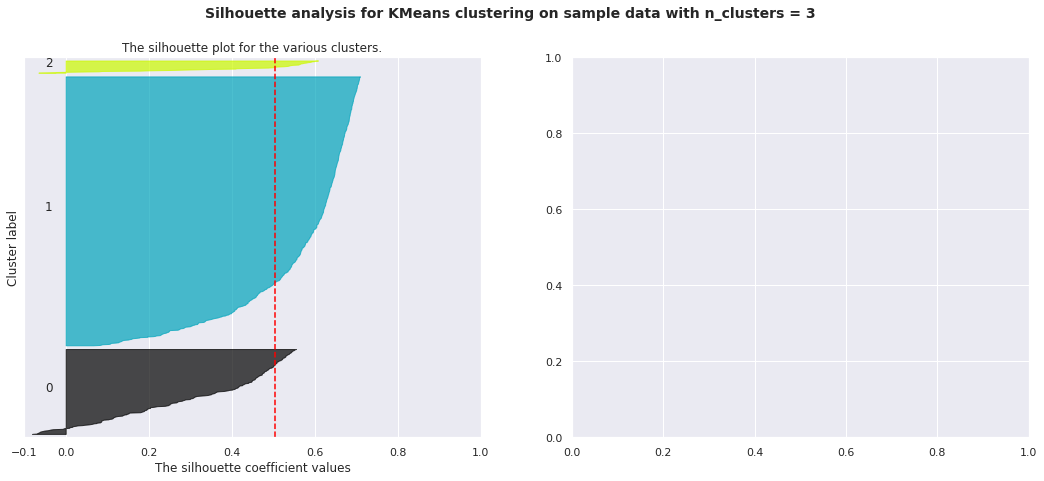

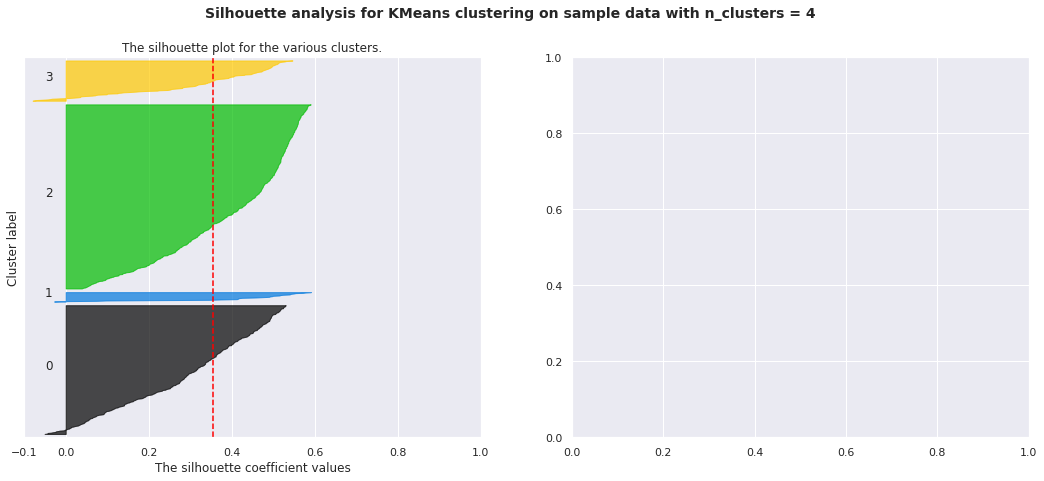

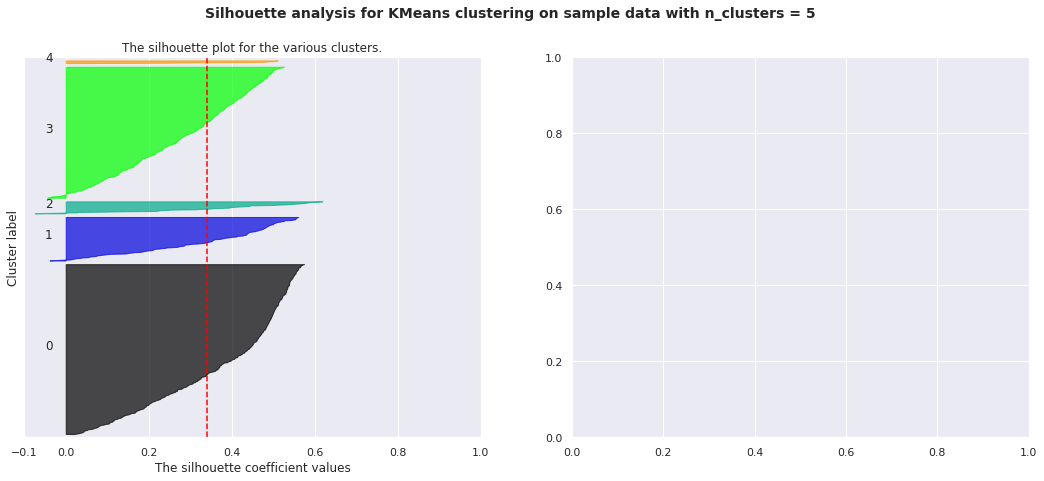

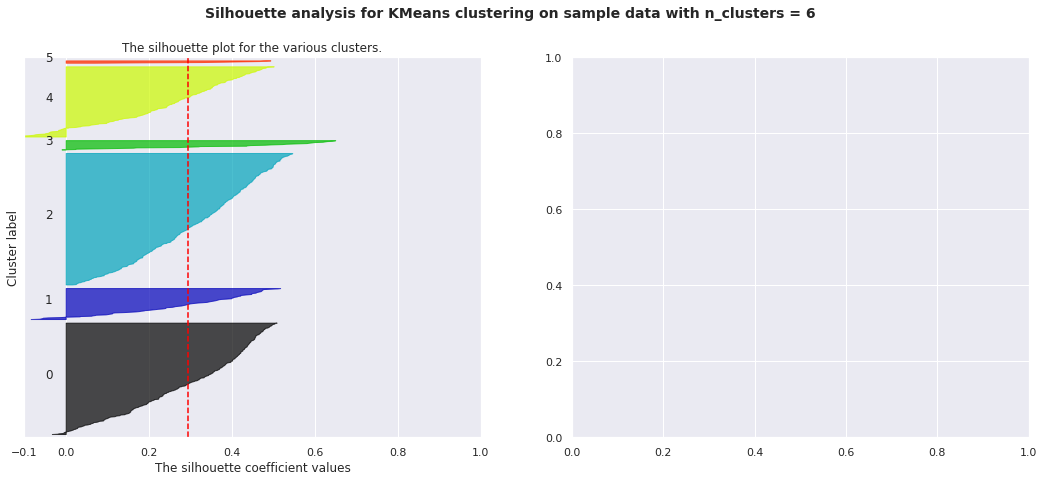

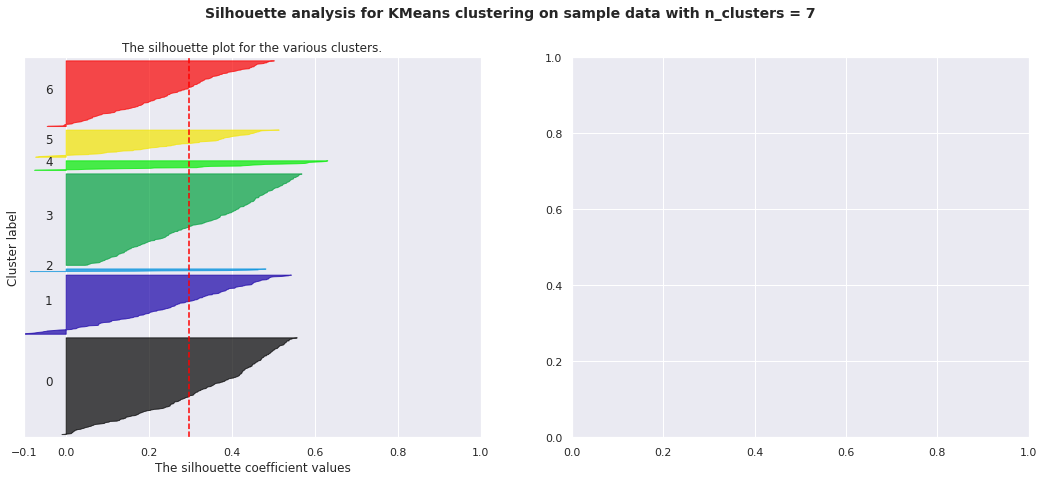

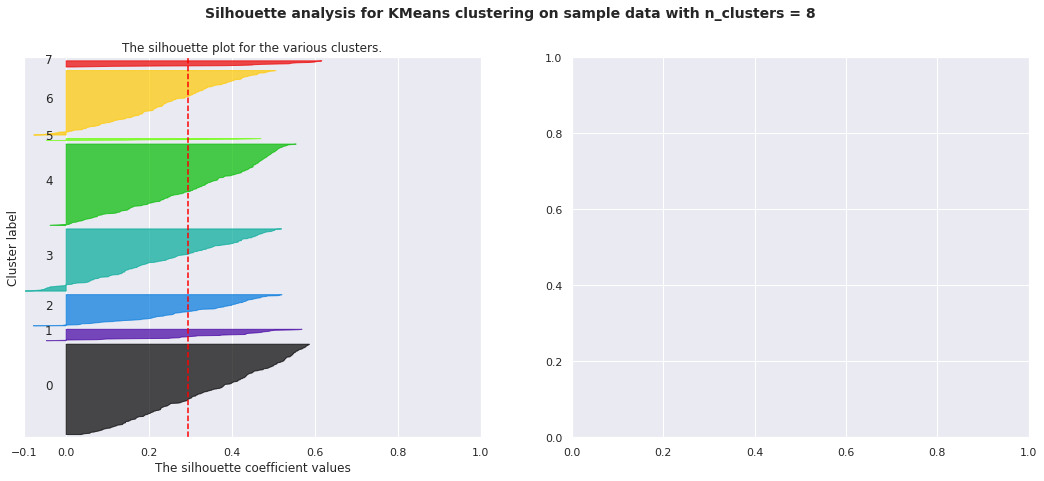

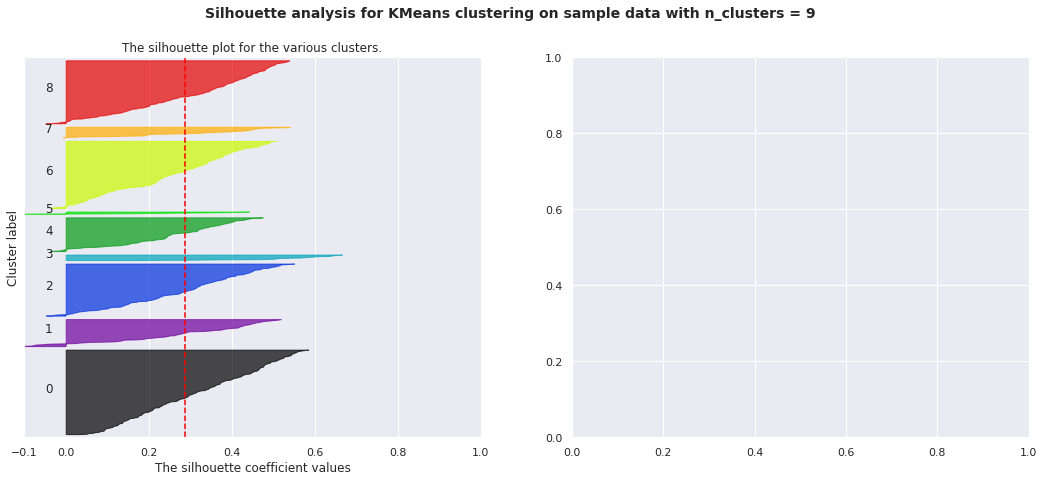

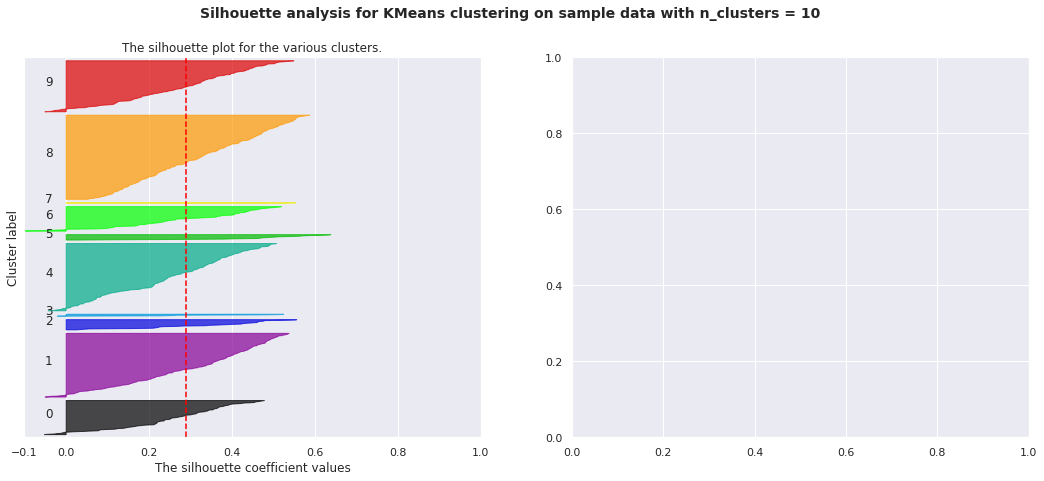

In [11]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(bowler_for_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(bowler_for_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(bowler_for_clustering, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(bowler_for_clustering, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    



    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [12]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(bowler_for_clustering_scaled)

In [13]:
ypred_kmeans

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [14]:
print('Silhouette score :',np.round(silhouette_score(bowler_for_clustering_scaled, ypred_kmeans),3))
print('Calinski-Harabasz Index :',np.round(metrics.calinski_harabasz_score(bowler_for_clustering_scaled, ypred_kmeans),3))
print(' Davies-Bouldin Index :',np.round(metrics.davies_bouldin_score(bowler_for_clustering_scaled, ypred_kmeans),3))

Silhouette score : 0.223
Calinski-Harabasz Index : 392.948
 Davies-Bouldin Index : 1.27


In [15]:
## 1 - good, 0 - Avg , 2 - poor

In [16]:
results = data_scaled
results['kmeans'] = ypred_kmeans

In [17]:
results

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,Shakib Al Hasan,BAN,0.927337,0.913447,0.686481,0.909833,0.480417,0.1575,0.469333,0.496182,0
1,TG Southee,NZ,0.901717,0.912674,0.540748,0.898167,0.472083,0.0550,0.515111,0.337093,0
2,Rashid Khan,AFG,0.964841,0.952859,0.739214,0.930056,0.702917,0.2450,0.670667,0.544905,0
3,SL Malinga,SL,0.922377,0.921175,0.614573,0.869500,0.495417,0.0900,0.516444,0.440323,0
4,Shahid Afridi,PAK,0.902480,0.880216,0.690316,0.907889,0.379167,0.0775,0.406667,0.502173,0
...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,0.675933,0.641422,0.609779,0.375000,0.062500,0.0000,0.111111,0.743025,2
1081,JJ Tucker,BMUDA,0.697738,0.726430,0.477469,0.250000,0.062500,0.0000,0.111111,0.772394,2
1082,CL White,AUS,0.757700,0.726430,0.627996,0.133333,0.041667,0.0000,0.088889,0.928047,2
1083,Zahid Khan,SLE,0.626874,0.587326,0.606903,0.500000,0.062500,0.0000,0.111111,0.676946,2


In [18]:
results['kmeans'].value_counts()

0    340
1    301
3    261
2    183
Name: kmeans, dtype: int64

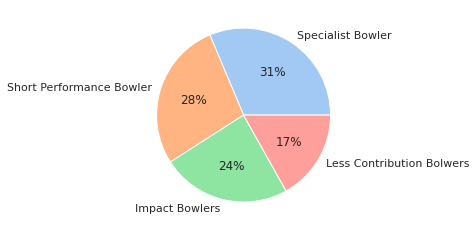

In [19]:
plt.pie(results['kmeans'].value_counts(), colors= sns.color_palette('pastel'), autopct='%.0f%%', labels = ['Specialist Bowler','Short Performance Bowler','Impact Bowlers','Less Contribution Bolwers'])
plt.show()  

In [20]:
top10countries = ['INDIA','ENG','PAK','SA','NZ','AUS','WI','SL','BAN','AFG']

In [21]:
columns = bowler_for_clustering_scaled.columns
columns

Index(['average', 'strike_rate', 'economy', 'balls_bolwed_per_innings',
       'wicket_index', 'big_impact_index', 'short_impact_index', 'runs_index'],
      dtype='object')

In [22]:
np.round(kmodel.cluster_centers_,3)

array([[0.935, 0.929, 0.658, 0.841, 0.538, 0.107, 0.56 , 0.507],
       [0.918, 0.899, 0.689, 0.616, 0.342, 0.046, 0.381, 0.674],
       [0.78 , 0.792, 0.521, 0.35 , 0.15 , 0.006, 0.2  , 0.724],
       [0.815, 0.824, 0.527, 0.752, 0.269, 0.016, 0.322, 0.432]])

In [23]:
cluster_center = pd.DataFrame(data=np.round(kmodel.cluster_centers_,3) , columns = columns, 
                              index=('Specialist Bowler','Short Perfromance Bowler','Less Contribution Bolwers','Impact Bowlers'))
cluster_center['No. of Bowlers'] = [340,301,183,261]

cols = cluster_center.columns.tolist()
cols = cols[-1:] + cols[:-1]


cluster_center = cluster_center [cols]
cluster_center

,No. of Bowlers,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
Specialist Bowler,340,0.935,0.929,0.658,0.841,0.538,0.107,0.560,0.507
Short Perfromance Bowler,301,0.918,0.899,0.689,0.616,0.342,0.046,0.381,0.674
Less Contribution Bolwers,183,0.780,0.792,0.521,0.350,0.150,0.006,0.200,0.724
Impact Bowlers,261,0.815,0.824,0.527,0.752,0.269,0.016,0.322,0.432


In [24]:
results[(results.country.isin(top10countries))&(results['kmeans']==0)].head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,Shakib Al Hasan,BAN,0.927337,0.913447,0.686481,0.909833,0.480417,0.1575,0.469333,0.496182,0
1,TG Southee,NZ,0.901717,0.912674,0.540748,0.898167,0.472083,0.0550,0.515111,0.337093,0
2,Rashid Khan,AFG,0.964841,0.952859,0.739214,0.930056,0.702917,0.2450,0.670667,0.544905,0
3,SL Malinga,SL,0.922377,0.921175,0.614573,0.869500,0.495417,0.0900,0.516444,0.440323,0
4,Shahid Afridi,PAK,0.902480,0.880216,0.690316,0.907889,0.379167,0.0775,0.406667,0.502173,0
5,Mustafizur Rahman,BAN,0.928591,0.931221,0.600192,0.859278,0.533750,0.1575,0.527111,0.430455,0
6,Saeed Ajmal,PAK,0.938512,0.921175,0.716203,0.927000,0.520417,0.1575,0.519556,0.520910,0
7,IS Sodhi,NZ,0.915944,0.925039,0.554171,0.845333,0.498750,0.0775,0.537778,0.390602,0
8,AU Rashid,ENG,0.911911,0.906491,0.629914,0.872389,0.440417,0.0725,0.477333,0.455624,0
14,A Zampa,AUS,0.920033,0.906491,0.674976,0.877056,0.443333,0.0400,0.488889,0.502056,0


In [25]:
results[(results.country.isin(top10countries))&(results['kmeans']==1)].head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
28,Mohammad Hafeez,PAK,0.911693,0.891808,0.693193,0.553167,0.280000,0.0325,0.324889,0.711601,1
34,NL McCullum,NZ,0.915617,0.901855,0.672100,0.723722,0.367917,0.0850,0.389778,0.591454,1
41,Imad Wasim,PAK,0.907659,0.879444,0.719080,0.859667,0.360417,0.0875,0.371556,0.561909,1
57,AC Agar,AUS,0.914200,0.891808,0.704698,0.836222,0.384167,0.1075,0.363556,0.558502,1
69,DJG Sammy,WI,0.897465,0.890263,0.625120,0.527667,0.269167,0.0850,0.272889,0.672100,1
106,Faheem Ashraf,PAK,0.895067,0.892581,0.604027,0.638222,0.314167,0.0000,0.379556,0.580793,1
114,MM Ali,ENG,0.894685,0.899536,0.569511,0.524611,0.285833,0.0000,0.349333,0.630455,1
144,Samiullah Shinwari,AFG,0.901772,0.876352,0.701822,0.591222,0.265417,0.1325,0.234667,0.695888,1
147,Yuvraj Singh,INDIA,0.938566,0.934312,0.649089,0.423667,0.334583,0.0000,0.401333,0.754860,1
151,D Pretorius,SA,0.924285,0.933539,0.556088,0.657944,0.447500,0.1075,0.444444,0.522761,1


In [26]:
results[(results.country.isin(top10countries))&(results['kmeans']==2)].head(15)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
77,KA Pollard,WI,0.881548,0.894127,0.528284,0.420111,0.236250,0.040,0.272444,0.673803,2
96,Mahmudullah,BAN,0.888853,0.877898,0.636625,0.344611,0.185000,0.000,0.241778,0.797004,2
103,GJ Maxwell,AUS,0.884165,0.878671,0.609779,0.423722,0.212500,0.000,0.271111,0.729339,2
145,Shoaib Malik,PAK,0.904334,0.894127,0.645254,0.312944,0.196250,0.000,0.253778,0.823025,2
158,JA Morkel,SA,0.854565,0.859351,0.558006,0.445667,0.193750,0.000,0.251111,0.675977,2
215,JP Duminy,SA,0.880240,0.880989,0.581975,0.293500,0.171667,0.000,0.227556,0.798532,2
222,JDS Neesham,NZ,0.883620,0.911128,0.441994,0.394278,0.260000,0.000,0.321778,0.634156,2
234,JEC Franklin,NZ,0.922050,0.925039,0.592522,0.362833,0.278750,0.095,0.284444,0.756593,2
235,CH Gayle,WI,0.915781,0.904173,0.662512,0.370000,0.236250,0.000,0.296444,0.796858,2
236,Gulbadin Naib,AFG,0.848188,0.856260,0.542665,0.491167,0.203333,0.000,0.261333,0.633333,2


In [27]:
results[(results.country.isin(top10countries))&(results['kmeans']==3)].head(15)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
9,CJ Jordan,ENG,0.882420,0.901082,0.496644,0.835611,0.408750,0.0675,0.444444,0.334655,3
10,DJ Bravo,WI,0.893431,0.902628,0.548418,0.751056,0.380417,0.0975,0.396444,0.451043,3
12,Mohammad Nabi,AFG,0.883510,0.872488,0.630872,0.761778,0.314167,0.0850,0.330667,0.527372,3
43,Sohail Tanvir,PAK,0.888962,0.877898,0.637584,0.849111,0.352917,0.0000,0.420889,0.478443,3
47,NLTC Perera,SL,0.852221,0.884080,0.430489,0.579111,0.275417,0.0000,0.338222,0.474978,3
51,PVD Chameera,SL,0.870700,0.878671,0.545542,0.855333,0.358333,0.0500,0.399111,0.374156,3
53,RA Jadeja,INDIA,0.886072,0.870943,0.651007,0.780333,0.315417,0.0000,0.380889,0.536388,3
55,SR Watson,AUS,0.900954,0.901855,0.592522,0.721111,0.366667,0.0500,0.407556,0.516182,3
72,KD Mills,NZ,0.880076,0.890263,0.538830,0.851611,0.385000,0.0000,0.455111,0.368928,3
74,Mashrafe Mortaza,BAN,0.837558,0.841577,0.555129,0.858500,0.288333,0.0475,0.324889,0.381468,3


In [28]:
results = np.round(results,3)

# Defining accuracy Metrics

In [29]:
def get_accuracy_metrics(y_pred,y_test):

  bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
  print ('The balanced accuracy on test data is %s' % (round(bal_acc,5)))

  f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
  print('F1 score micro :',round(f1_micro ,5))

  f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
  print('F1 score macro :',round(f1_macro ,5))

  f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
  print('F1 score weighted :',round(f1_weighted,5))

  recall = metrics.recall_score(y_test, y_pred, average='macro')
  print('Recall score :',recall)

  precision = metrics.precision_score(y_test, y_pred, average='macro')
  print('Precision score :',precision)

  print('\n\n\n\n\n\n\n\n')

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(confusion_matrix,annot=True, fmt="d",cmap="YlGnBu")


# Classification

## Random Forest

In [30]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)
X_test.drop(['name','country'],axis=1,inplace=True)

In [31]:
X_train

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
249,0.938,0.904,0.784,0.775,0.397,0.132,0.395,0.674
618,0.899,0.852,0.764,0.778,0.283,0.000,0.346,0.653
1067,0.523,0.448,0.633,0.750,0.062,0.000,0.111,0.537
71,0.903,0.900,0.611,0.895,0.430,0.000,0.503,0.420
94,0.904,0.902,0.605,0.798,0.398,0.070,0.419,0.476
...,...,...,...,...,...,...,...,...
330,0.886,0.873,0.638,0.790,0.326,0.000,0.392,0.514
466,0.990,0.963,0.902,0.933,0.792,0.500,0.556,0.734
121,0.941,0.935,0.659,0.619,0.435,0.357,0.259,0.643
1044,0.692,0.587,0.722,0.500,0.062,0.000,0.111,0.765


In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred_rfc = rfc.predict(X_test)

In [33]:
fi_ovr = np.round(rfc.feature_importances_.tolist(),3)
dict_ovr = dict(zip(columns,np.array(fi_ovr)))
dict_ovr

{'average': 0.163,
 'strike_rate': 0.063,
 'economy': 0.07,
 'balls_bolwed_per_innings': 0.219,
 'wicket_index': 0.171,
 'big_impact_index': 0.01,
 'short_impact_index': 0.131,
 'runs_index': 0.173}

The balanced accuracy on test data is 0.94648
F1 score micro : 0.95092
F1 score macro : 0.95124
F1 score weighted : 0.95095
Recall score : 0.9464789772515267
Precision score : 0.9568862672322376











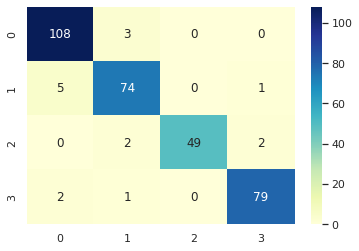

In [34]:
get_accuracy_metrics(ypred_rfc,y_test)

In [35]:
final_index = results.copy()

In [36]:
final_index['rfc_score'] = 0
for i in columns:
  final_index['rfc_score'] = np.round(final_index['rfc_score'] + (final_index[i] * dict_ovr.get(i)),3)   

In [37]:
final_index[final_index.country.isin(top10countries)].sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score
454,AY Patel,NZ,0.977,0.942,0.892,0.905,0.613,0.357,0.519,0.733,0,0.782
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.777
510,Fazalhaq Farooqi,AFG,0.955,0.927,0.791,1.000,0.583,0.000,0.667,0.572,0,0.774
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,0.763
26,PWH de Silva,SL,0.959,0.952,0.692,0.893,0.676,0.140,0.706,0.512,0,0.758
289,CK Langeveldt,SA,0.958,0.961,0.626,0.889,0.745,0.277,0.722,0.441,0,0.757
729,R Ravindra,NZ,0.960,0.904,0.908,0.933,0.458,0.000,0.533,0.740,0,0.757
431,Zulfiqar Babar,PAK,0.952,0.951,0.644,0.905,0.672,0.000,0.762,0.451,0,0.751
653,T Natarajan,INDIA,0.941,0.945,0.595,1.000,0.688,0.000,0.778,0.332,0,0.751
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,0.749


## KNN

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
ypred_knn = knn.predict(X_test)

The balanced accuracy on test data is 0.91068
F1 score micro : 0.92025
F1 score macro : 0.91663
F1 score weighted : 0.9201
Recall score : 0.9106816923918857
Precision score : 0.9244285051261337











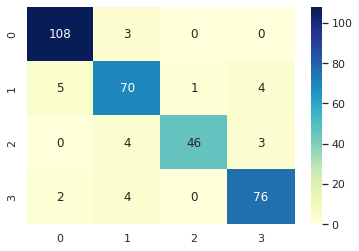

In [39]:
get_accuracy_metrics(ypred_knn,y_test)

## XGBoost

In [40]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)

The balanced accuracy on test data is 0.92513
F1 score micro : 0.93558
F1 score macro : 0.92874
F1 score weighted : 0.93492
Recall score : 0.9251290665953574
Precision score : 0.9335598320779296











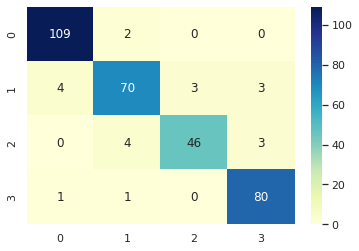

In [41]:
get_accuracy_metrics(ypred_xgb,y_test)

In [42]:
importance = np.round(xgb.feature_importances_,3)
dict_xgb = dict(zip(columns,importance))
dict_xgb

{'average': 0.225,
 'strike_rate': 0.016,
 'economy': 0.022,
 'balls_bolwed_per_innings': 0.178,
 'wicket_index': 0.268,
 'big_impact_index': 0.003,
 'short_impact_index': 0.077,
 'runs_index': 0.211}

In [43]:
final_index['xgb_score'] = 0
for i in columns:
  final_index['xgb_score'] = np.round(final_index['xgb_score'] + (final_index[i] * dict_xgb.get(i)),3)   

In [44]:
final_index[final_index.country.isin(top10countries)].sort_values('xgb_score',ascending = False).head(10).drop(['rfc_score'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,xgb_score
454,AY Patel,NZ,0.977,0.942,0.892,0.905,0.613,0.357,0.519,0.733,0,0.776
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.770
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,0.766
510,Fazalhaq Farooqi,AFG,0.955,0.927,0.791,1.000,0.583,0.000,0.667,0.572,0,0.753
289,CK Langeveldt,SA,0.958,0.961,0.626,0.889,0.745,0.277,0.722,0.441,0,0.753
26,PWH de Silva,SL,0.959,0.952,0.692,0.893,0.676,0.140,0.706,0.512,0,0.748
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,0.742
17,BAW Mendis,SL,0.957,0.947,0.708,0.926,0.663,0.320,0.549,0.511,0,0.740
431,Zulfiqar Babar,PAK,0.952,0.951,0.644,0.905,0.672,0.000,0.762,0.451,0,0.738
485,PP Ojha,INDIA,0.964,0.954,0.724,0.833,0.653,0.418,0.533,0.581,0,0.736


## Voting  Ensembles

In [45]:
xgb = XGBClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [46]:
voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb), ('decision_tree', dtree)],
    voting='hard')

In [47]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xg_boost', XGBClassifier()),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42))])

In [48]:
for clf in (rfc,dtree,xgb,voting):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9447852760736196
DecisionTreeClassifier 0.8834355828220859
XGBClassifier 0.9355828220858896
VotingClassifier 0.9386503067484663


In [49]:
ypred_voting = voting.predict(X_test)

The balanced accuracy on test data is 0.92913
F1 score micro : 0.93865
F1 score macro : 0.93417
F1 score weighted : 0.93832
Recall score : 0.9291268143431053
Precision score : 0.9411770436960586











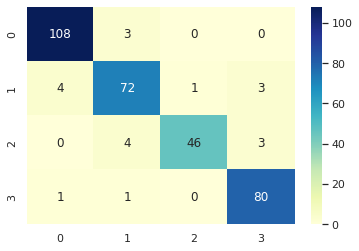

In [50]:
get_accuracy_metrics(ypred_voting,y_test)

In [51]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    ## print(feature_importance.values())

    fe_scores = [0]*len(list(feature_importance.values())[0])

    ## print(fe_scores)
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [52]:
dict_voting = dict(zip(columns,np.round(compute_feature_importance(voting, [1/3,1/3,1/3]),3)))
dict_voting

{'average': 0.176,
 'strike_rate': 0.033,
 'economy': 0.041,
 'balls_bolwed_per_innings': 0.232,
 'wicket_index': 0.239,
 'big_impact_index': 0.004,
 'short_impact_index': 0.071,
 'runs_index': 0.204}

In [53]:
final_index['voting_score'] = 0
for i in columns:
  final_index['voting_score'] = np.round(final_index['voting_score'] + (final_index[i] * dict_voting.get(i)),3)

In [54]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).head(10).drop(['rfc_score','xgb_score'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,voting_score
454,AY Patel,NZ,0.977,0.942,0.892,0.905,0.613,0.357,0.519,0.733,0,0.785
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.775
510,Fazalhaq Farooqi,AFG,0.955,0.927,0.791,1.000,0.583,0.000,0.667,0.572,0,0.766
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,0.755
289,CK Langeveldt,SA,0.958,0.961,0.626,0.889,0.745,0.277,0.722,0.441,0,0.753
26,PWH de Silva,SL,0.959,0.952,0.692,0.893,0.676,0.140,0.706,0.512,0,0.752
729,R Ravindra,NZ,0.960,0.904,0.908,0.933,0.458,0.000,0.533,0.740,0,0.750
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,0.745
17,BAW Mendis,SL,0.957,0.947,0.708,0.926,0.663,0.320,0.549,0.511,0,0.745
431,Zulfiqar Babar,PAK,0.952,0.951,0.644,0.905,0.672,0.000,0.762,0.451,0,0.742


In [55]:
middle_ovr = pd.DataFrame()

# One against all

## For 0

In [56]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:0,0:1})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [57]:
rfc_0 = RandomForestClassifier()
rfc_0.fit(X_train, y_train)
ypred_rfc_0 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_0 = np.round(rfc_0.feature_importances_,3)
dict_0 = dict(zip(columns,fi_0))
dict_0

{'average': 0.092,
 'strike_rate': 0.092,
 'economy': 0.038,
 'balls_bolwed_per_innings': 0.204,
 'wicket_index': 0.279,
 'big_impact_index': 0.027,
 'short_impact_index': 0.199,
 'runs_index': 0.068}

In [58]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,Shakib Al Hasan,BAN,0.927,0.913,0.686,0.910,0.480,0.158,0.469,0.496,1
1,TG Southee,NZ,0.902,0.913,0.541,0.898,0.472,0.055,0.515,0.337,1
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,1
3,SL Malinga,SL,0.922,0.921,0.615,0.869,0.495,0.090,0.516,0.440,1
4,Shahid Afridi,PAK,0.902,0.880,0.690,0.908,0.379,0.078,0.407,0.502,1
...,...,...,...,...,...,...,...,...,...,...,...
843,HMCM Bandara,SL,0.905,0.889,0.669,0.833,0.375,0.000,0.444,0.523,1
850,Dawood Ahmadzai,Fran,0.928,0.877,0.822,0.917,0.375,0.000,0.444,0.648,1
886,Osama Mahmood,SUI,0.904,0.889,0.663,0.833,0.375,0.000,0.444,0.515,1
891,Ravi Bishnoi,INDIA,0.889,0.866,0.679,1.000,0.375,0.000,0.444,0.435,1


In [59]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_0.get(i)),3)

In [60]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
497,Waqar Ali,CYP,0.999,0.982,0.894,0.875,1.000,0.625,0.889,0.736,0.917
538,Sirajullah Khadim,PORT,0.990,0.969,0.871,1.000,0.896,0.000,1.000,0.670,0.912
209,D Maisuria,BOT,0.993,0.981,0.826,0.889,0.977,0.555,0.889,0.666,0.903
374,Ashwin Vinod,SUI,0.976,0.969,0.734,0.944,0.861,0.000,0.963,0.533,0.868
542,I Wardlaw,SCOT,0.948,0.969,0.457,1.000,0.896,0.000,1.000,0.163,0.857
214,AC Botha,IRE,0.988,0.976,0.807,0.800,0.833,0.000,0.933,0.687,0.840
231,S Conteh,SLE,0.990,0.977,0.826,0.852,0.884,0.555,0.698,0.683,0.833
367,Salman Nazar,CAN,0.977,0.965,0.766,0.905,0.792,0.000,0.889,0.590,0.831
349,Bilal Zalmai,Aut,0.982,0.965,0.822,0.905,0.792,0.357,0.741,0.653,0.817
507,LA Burns,ESP,1.000,0.985,0.892,0.750,0.896,0.625,0.592,0.794,0.809


In [61]:
middle_ovr = results_new[results_new.kmeans == 1].copy()

## For 1

In [62]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:1,2:0,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [63]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train, y_train)
ypred_rfc_1 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_1 = np.round(rfc_1.feature_importances_,3)
dict_1 = dict(zip(columns,fi_1))
dict_1

{'average': 0.128,
 'strike_rate': 0.06,
 'economy': 0.122,
 'balls_bolwed_per_innings': 0.233,
 'wicket_index': 0.141,
 'big_impact_index': 0.013,
 'short_impact_index': 0.085,
 'runs_index': 0.218}

In [64]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
11,GH Dockrell,IRE,0.918,0.911,0.643,0.718,0.392,0.035,0.444,0.567,1
28,Mohammad Hafeez,PAK,0.912,0.892,0.693,0.553,0.280,0.032,0.325,0.712,1
34,NL McCullum,NZ,0.916,0.902,0.672,0.724,0.368,0.085,0.390,0.591,1
35,KJ O'Brien,IRE,0.928,0.929,0.606,0.644,0.423,0.047,0.471,0.579,1
36,PM Seelaar,NED,0.914,0.900,0.671,0.648,0.336,0.040,0.381,0.636,1
...,...,...,...,...,...,...,...,...,...,...,...
982,K Vislapuu,EST,0.879,0.881,0.577,0.583,0.271,0.000,0.333,0.596,1
989,Abdullah Sheikh,NOR,0.820,0.773,0.695,0.667,0.167,0.000,0.222,0.648,1
1001,AP Devcich,NZ,0.818,0.773,0.687,0.667,0.167,0.000,0.222,0.640,1
1021,S Ogundipe,NGA,0.913,0.819,0.895,0.500,0.167,0.000,0.222,0.897,1


In [65]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_1.get(i)),3)

In [66]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
832,AA Westphal,Mex,0.965,0.875,0.998,0.933,0.375,0.000,0.444,0.846,0.790
519,ND Laegsgaard,DEN,0.972,0.933,0.889,0.762,0.494,0.000,0.572,0.787,0.757
300,SA Ahmad,DEN,0.976,0.941,0.888,0.722,0.514,0.000,0.592,0.802,0.754
599,R van der Merwe,Arg,0.993,0.976,0.870,0.533,0.625,0.000,0.711,0.863,0.752
453,TM Odoyo,KENYA,0.951,0.900,0.873,0.867,0.417,0.000,0.489,0.728,0.745
395,Raja Adeel,ESP,0.962,0.909,0.907,0.778,0.410,0.000,0.481,0.799,0.743
597,H Thaker,CAN,0.961,0.912,0.891,0.810,0.435,0.357,0.296,0.770,0.735
475,K Gore,USA,0.968,0.935,0.850,0.708,0.479,0.000,0.556,0.772,0.732
875,Mohammad Kamran,ESP,0.935,0.877,0.853,0.917,0.375,0.000,0.444,0.684,0.731
563,Faran Afzal,ESP,0.938,0.883,0.853,0.875,0.375,0.000,0.444,0.703,0.725


In [67]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

## For 2

In [68]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:1,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [69]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train, y_train)
ypred_rfc_2 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_2 = np.round(rfc_2.feature_importances_,3)
dict_2 = dict(zip(columns,fi_2))
dict_2

{'average': 0.072,
 'strike_rate': 0.061,
 'economy': 0.052,
 'balls_bolwed_per_innings': 0.399,
 'wicket_index': 0.156,
 'big_impact_index': 0.01,
 'short_impact_index': 0.145,
 'runs_index': 0.105}

In [70]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
77,KA Pollard,WI,0.882,0.894,0.528,0.420,0.236,0.04,0.272,0.674,1
96,Mahmudullah,BAN,0.889,0.878,0.637,0.345,0.185,0.00,0.242,0.797,1
103,GJ Maxwell,AUS,0.884,0.879,0.610,0.424,0.213,0.00,0.271,0.729,1
145,Shoaib Malik,PAK,0.904,0.894,0.645,0.313,0.196,0.00,0.254,0.823,1
158,JA Morkel,SA,0.855,0.859,0.558,0.446,0.194,0.00,0.251,0.676,1
...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,0.676,0.641,0.610,0.375,0.062,0.00,0.111,0.743,1
1081,JJ Tucker,BMUDA,0.698,0.726,0.477,0.250,0.062,0.00,0.111,0.772,1
1082,CL White,AUS,0.758,0.726,0.628,0.133,0.042,0.00,0.089,0.928,1
1083,Zahid Khan,SLE,0.627,0.587,0.607,0.500,0.062,0.00,0.111,0.677,1


In [71]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_2.get(i)),3)

In [72]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
848,MD Dai,PNG,0.822,0.761,0.724,0.593,0.143,0.000,0.197,0.715,0.506
655,SR Patel,ENG,0.786,0.773,0.593,0.600,0.153,0.000,0.208,0.599,0.491
992,Ali Naqi,PORT,0.859,0.819,0.703,0.500,0.167,0.000,0.222,0.750,0.486
946,N Krishna,SEY,0.839,0.850,0.530,0.533,0.208,0.000,0.267,0.593,0.486
796,Muhammad Tanveer,QAT,0.857,0.839,0.638,0.500,0.190,0.000,0.247,0.692,0.485
822,DC Stovell,BMUDA,0.858,0.864,0.551,0.504,0.219,0.000,0.278,0.629,0.485
660,Sahel Zadran,Aut,0.796,0.798,0.556,0.576,0.167,0.000,0.222,0.581,0.484
279,SR Thompson,IRE,0.833,0.848,0.513,0.544,0.208,0.082,0.215,0.572,0.480
359,Karim Sadiq,AFG,0.848,0.819,0.666,0.500,0.167,0.000,0.222,0.722,0.480
906,T Taylor,Caym,0.816,0.808,0.592,0.542,0.167,0.000,0.222,0.637,0.480


In [73]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

## For 3

In [74]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:1,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','country'],axis=1,inplace=True)

In [75]:
rfc_3 = RandomForestClassifier()
rfc_3.fit(X_train, y_train)
ypred_rfc_3 = rfc.predict(X_test.drop(['name','country'],axis=1))
fi_3 = np.round(rfc_3.feature_importances_,3)
dict_3 = dict(zip(columns,fi_3))
dict_3

{'average': 0.213,
 'strike_rate': 0.104,
 'economy': 0.082,
 'balls_bolwed_per_innings': 0.141,
 'wicket_index': 0.104,
 'big_impact_index': 0.005,
 'short_impact_index': 0.073,
 'runs_index': 0.278}

In [76]:
results_new[results_new.kmeans == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
9,CJ Jordan,ENG,0.882,0.901,0.497,0.836,0.409,0.067,0.444,0.335,1
10,DJ Bravo,WI,0.893,0.903,0.548,0.751,0.380,0.097,0.396,0.451,1
12,Mohammad Nabi,AFG,0.884,0.872,0.631,0.762,0.314,0.085,0.331,0.527,1
43,Sohail Tanvir,PAK,0.889,0.878,0.638,0.849,0.353,0.000,0.421,0.478,1
47,NLTC Perera,SL,0.852,0.884,0.430,0.579,0.275,0.000,0.338,0.475,1
...,...,...,...,...,...,...,...,...,...,...,...
1060,Khurram Chohan,CAN,0.458,0.487,0.491,0.675,0.062,0.000,0.111,0.449,1
1061,S Kushretha,LUX,0.480,0.402,0.628,0.833,0.062,0.000,0.111,0.479,1
1067,T Mupariwa,ZIM,0.523,0.448,0.633,0.750,0.062,0.000,0.111,0.537,1
1069,R Nil,SEY,0.474,0.495,0.503,0.667,0.062,0.000,0.111,0.471,1


In [77]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_3.get(i)),3)

In [78]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
701,PF Gallagher,Fin,0.886,0.842,0.740,0.952,0.315,0.0,0.381,0.535,0.682
317,M Theekshana,SL,0.887,0.854,0.709,0.926,0.329,0.0,0.395,0.513,0.673
393,RW Price,ZIM,0.877,0.832,0.737,0.944,0.297,0.0,0.361,0.534,0.672
694,NM Carter,SCOT,0.883,0.850,0.707,0.905,0.315,0.0,0.381,0.523,0.668
462,MH Yardy,ENG,0.888,0.858,0.703,0.846,0.311,0.0,0.376,0.552,0.667
43,Sohail Tanvir,PAK,0.889,0.878,0.638,0.849,0.353,0.0,0.421,0.478,0.653
53,RA Jadeja,INDIA,0.886,0.871,0.651,0.780,0.315,0.0,0.381,0.536,0.653
269,CRD Fernando,SL,0.895,0.889,0.620,0.833,0.375,0.0,0.444,0.471,0.653
265,Tanwir Afzal,HKG,0.890,0.878,0.640,0.794,0.335,0.0,0.402,0.516,0.652
679,Abdullah Jasat,PNM,0.899,0.896,0.602,0.778,0.375,0.0,0.444,0.488,0.650


In [79]:
middle_ovr = middle_ovr.append(results_new[results_new.kmeans == 1])

In [80]:
middle_ovr

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
0,Shakib Al Hasan,BAN,0.927,0.913,0.686,0.910,0.480,0.158,0.469,0.496,1,0.646
1,TG Southee,NZ,0.902,0.913,0.541,0.898,0.472,0.055,0.515,0.337,1,0.629
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,1,0.769
3,SL Malinga,SL,0.922,0.921,0.615,0.869,0.495,0.090,0.516,0.440,1,0.643
4,Shahid Afridi,PAK,0.902,0.880,0.690,0.908,0.379,0.078,0.407,0.502,1,0.598
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,Khurram Chohan,CAN,0.458,0.487,0.491,0.675,0.062,0.000,0.111,0.449,1,0.423
1061,S Kushretha,LUX,0.480,0.402,0.628,0.833,0.062,0.000,0.111,0.479,1,0.459
1067,T Mupariwa,ZIM,0.523,0.448,0.633,0.750,0.062,0.000,0.111,0.537,1,0.479
1069,R Nil,SEY,0.474,0.495,0.503,0.667,0.062,0.000,0.111,0.471,1,0.432


In [81]:
final_index = pd.merge(final_index,middle_ovr[['name','country','rbml_score']],on=['name','country'],how='left')

In [82]:
final_index[final_index.country.isin(top10countries)].sort_values('rbml_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,0.785
653,T Natarajan,INDIA,0.941,0.945,0.595,1.000,0.688,0.000,0.778,0.332,0,0.771
289,CK Langeveldt,SA,0.958,0.961,0.626,0.889,0.745,0.277,0.722,0.441,0,0.770
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.769
661,Sayed Shirzad,AFG,0.945,0.952,0.585,0.917,0.688,0.000,0.778,0.376,0,0.757
431,Zulfiqar Babar,PAK,0.952,0.951,0.644,0.905,0.672,0.000,0.762,0.451,0,0.754
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,0.753
26,PWH de Silva,SL,0.959,0.952,0.692,0.893,0.676,0.140,0.706,0.512,0,0.752
285,AB Dinda,INDIA,0.957,0.970,0.544,0.778,0.745,0.277,0.722,0.428,0,0.745
510,Fazalhaq Farooqi,AFG,0.955,0.927,0.791,1.000,0.583,0.000,0.667,0.572,0,0.742


In [83]:
final_index

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
0,Shakib Al Hasan,BAN,0.927,0.913,0.686,0.910,0.480,0.158,0.469,0.496,0,0.687,0.671,0.682,0.646
1,TG Southee,NZ,0.902,0.913,0.541,0.898,0.472,0.055,0.515,0.337,0,0.647,0.627,0.638,0.629
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.777,0.770,0.775,0.769
3,SL Malinga,SL,0.922,0.921,0.615,0.869,0.495,0.090,0.516,0.440,0,0.671,0.657,0.664,0.643
4,Shahid Afridi,PAK,0.902,0.880,0.690,0.908,0.379,0.078,0.407,0.502,0,0.655,0.633,0.649,0.598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,0.676,0.641,0.610,0.375,0.062,0.000,0.111,0.743,2,0.430,0.425,0.427,0.374
1081,JJ Tucker,BMUDA,0.698,0.726,0.477,0.250,0.062,0.000,0.111,0.772,2,0.408,0.413,0.405,0.326
1082,CL White,AUS,0.758,0.726,0.628,0.133,0.042,0.000,0.089,0.928,2,0.423,0.435,0.419,0.302
1083,Zahid Khan,SLE,0.627,0.587,0.607,0.500,0.062,0.000,0.111,0.677,2,0.433,0.421,0.431,0.409


In [84]:
final_index[final_index.country.isin(top10countries)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,0.763,0.766,0.755,0.785
653,T Natarajan,INDIA,0.941,0.945,0.595,1.000,0.688,0.000,0.778,0.332,0,0.751,0.732,0.740,0.771
289,CK Langeveldt,SA,0.958,0.961,0.626,0.889,0.745,0.277,0.722,0.441,0,0.757,0.753,0.753,0.770
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.777,0.770,0.775,0.769
661,Sayed Shirzad,AFG,0.945,0.952,0.585,0.917,0.688,0.000,0.778,0.376,0,0.741,0.727,0.730,0.757
431,Zulfiqar Babar,PAK,0.952,0.951,0.644,0.905,0.672,0.000,0.762,0.451,0,0.751,0.738,0.742,0.754
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,0.749,0.742,0.745,0.753
26,PWH de Silva,SL,0.959,0.952,0.692,0.893,0.676,0.140,0.706,0.512,0,0.758,0.748,0.752,0.752
285,AB Dinda,INDIA,0.957,0.970,0.544,0.778,0.745,0.277,0.722,0.428,0,0.724,0.728,0.719,0.745
510,Fazalhaq Farooqi,AFG,0.955,0.927,0.791,1.000,0.583,0.000,0.667,0.572,0,0.774,0.753,0.766,0.742


In [85]:
final_index.sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
538,Sirajullah Khadim,PORT,0.990,0.969,0.871,1.000,0.896,0.000,1.000,0.670,0,0.902,0.894,0.896,0.912
497,Waqar Ali,CYP,0.999,0.982,0.894,0.875,1.000,0.625,0.889,0.736,0,0.900,0.910,0.903,0.917
209,D Maisuria,BOT,0.993,0.981,0.826,0.889,0.977,0.555,0.889,0.666,0,0.881,0.888,0.882,0.903
374,Ashwin Vinod,SUI,0.976,0.969,0.734,0.944,0.861,0.000,0.963,0.533,0,0.843,0.837,0.836,0.868
478,IG Holland,USA,0.987,0.944,0.956,0.944,0.653,0.000,0.741,0.792,0,0.840,0.825,0.834,0.790
214,AC Botha,IRE,0.988,0.976,0.807,0.800,0.833,0.000,0.933,0.687,0,0.836,0.838,0.830,0.840
532,C Rumistrzewicz,ESP,0.985,0.927,0.990,1.000,0.583,0.000,0.667,0.816,0,0.835,0.816,0.829,0.769
231,S Conteh,SLE,0.990,0.977,0.826,0.852,0.884,0.555,0.698,0.683,0,0.834,0.846,0.840,0.833
466,P Arrighi,Arg,0.990,0.963,0.902,0.933,0.792,0.500,0.556,0.734,0,0.829,0.836,0.839,0.799
349,Bilal Zalmai,Aut,0.982,0.965,0.822,0.905,0.792,0.357,0.741,0.653,0,0.826,0.823,0.825,0.817


In [86]:
final_index.sort_values('xgb_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
497,Waqar Ali,CYP,0.999,0.982,0.894,0.875,1.000,0.625,0.889,0.736,0,0.900,0.910,0.903,0.917
538,Sirajullah Khadim,PORT,0.990,0.969,0.871,1.000,0.896,0.000,1.000,0.670,0,0.902,0.894,0.896,0.912
209,D Maisuria,BOT,0.993,0.981,0.826,0.889,0.977,0.555,0.889,0.666,0,0.881,0.888,0.882,0.903
507,LA Burns,ESP,1.000,0.985,0.892,0.750,0.896,0.625,0.592,0.794,0,0.825,0.851,0.840,0.809
231,S Conteh,SLE,0.990,0.977,0.826,0.852,0.884,0.555,0.698,0.683,0,0.834,0.846,0.840,0.833
214,AC Botha,IRE,0.988,0.976,0.807,0.800,0.833,0.000,0.933,0.687,0,0.836,0.838,0.830,0.840
374,Ashwin Vinod,SUI,0.976,0.969,0.734,0.944,0.861,0.000,0.963,0.533,0,0.843,0.837,0.836,0.868
466,P Arrighi,Arg,0.990,0.963,0.902,0.933,0.792,0.500,0.556,0.734,0,0.829,0.836,0.839,0.799
478,IG Holland,USA,0.987,0.944,0.956,0.944,0.653,0.000,0.741,0.792,0,0.840,0.825,0.834,0.790
349,Bilal Zalmai,Aut,0.982,0.965,0.822,0.905,0.792,0.357,0.741,0.653,0,0.826,0.823,0.825,0.817


In [87]:
final_index.sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
497,Waqar Ali,CYP,0.999,0.982,0.894,0.875,1.000,0.625,0.889,0.736,0,0.900,0.910,0.903,0.917
538,Sirajullah Khadim,PORT,0.990,0.969,0.871,1.000,0.896,0.000,1.000,0.670,0,0.902,0.894,0.896,0.912
209,D Maisuria,BOT,0.993,0.981,0.826,0.889,0.977,0.555,0.889,0.666,0,0.881,0.888,0.882,0.903
374,Ashwin Vinod,SUI,0.976,0.969,0.734,0.944,0.861,0.000,0.963,0.533,0,0.843,0.837,0.836,0.868
542,I Wardlaw,SCOT,0.948,0.969,0.457,1.000,0.896,0.000,1.000,0.163,0,0.779,0.768,0.768,0.857
214,AC Botha,IRE,0.988,0.976,0.807,0.800,0.833,0.000,0.933,0.687,0,0.836,0.838,0.830,0.840
231,S Conteh,SLE,0.990,0.977,0.826,0.852,0.884,0.555,0.698,0.683,0,0.834,0.846,0.840,0.833
367,Salman Nazar,CAN,0.977,0.965,0.766,0.905,0.792,0.000,0.889,0.590,0,0.825,0.817,0.817,0.831
349,Bilal Zalmai,Aut,0.982,0.965,0.822,0.905,0.792,0.357,0.741,0.653,0,0.826,0.823,0.825,0.817
507,LA Burns,ESP,1.000,0.985,0.892,0.750,0.896,0.625,0.592,0.794,0,0.825,0.851,0.840,0.809


In [88]:
final_index.sort_values('voting_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
497,Waqar Ali,CYP,0.999,0.982,0.894,0.875,1.000,0.625,0.889,0.736,0,0.900,0.910,0.903,0.917
538,Sirajullah Khadim,PORT,0.990,0.969,0.871,1.000,0.896,0.000,1.000,0.670,0,0.902,0.894,0.896,0.912
209,D Maisuria,BOT,0.993,0.981,0.826,0.889,0.977,0.555,0.889,0.666,0,0.881,0.888,0.882,0.903
231,S Conteh,SLE,0.990,0.977,0.826,0.852,0.884,0.555,0.698,0.683,0,0.834,0.846,0.840,0.833
507,LA Burns,ESP,1.000,0.985,0.892,0.750,0.896,0.625,0.592,0.794,0,0.825,0.851,0.840,0.809
466,P Arrighi,Arg,0.990,0.963,0.902,0.933,0.792,0.500,0.556,0.734,0,0.829,0.836,0.839,0.799
374,Ashwin Vinod,SUI,0.976,0.969,0.734,0.944,0.861,0.000,0.963,0.533,0,0.843,0.837,0.836,0.868
478,IG Holland,USA,0.987,0.944,0.956,0.944,0.653,0.000,0.741,0.792,0,0.840,0.825,0.834,0.790
214,AC Botha,IRE,0.988,0.976,0.807,0.800,0.833,0.000,0.933,0.687,0,0.836,0.838,0.830,0.840
532,C Rumistrzewicz,ESP,0.985,0.927,0.990,1.000,0.583,0.000,0.667,0.816,0,0.835,0.816,0.829,0.769


In [89]:
final_index[final_index.country == 'INDIA'].sort_values('rfc_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,0.763,0.766,0.755,0.785
653,T Natarajan,INDIA,0.941,0.945,0.595,1.000,0.688,0.000,0.778,0.332,0,0.751,0.732,0.740,0.771
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,0.749,0.742,0.745,0.753
343,RP Singh,INDIA,0.954,0.949,0.673,0.889,0.653,0.277,0.611,0.493,0,0.738,0.730,0.734,0.727
485,PP Ojha,INDIA,0.964,0.954,0.724,0.833,0.653,0.418,0.533,0.581,0,0.737,0.736,0.739,0.714
285,AB Dinda,INDIA,0.957,0.970,0.544,0.778,0.745,0.277,0.722,0.428,0,0.724,0.728,0.719,0.745
397,NA Saini,INDIA,0.937,0.934,0.640,0.870,0.560,0.000,0.642,0.461,0,0.708,0.691,0.698,0.688
15,JJ Bumrah,INDIA,0.927,0.910,0.703,0.884,0.457,0.000,0.532,0.529,0,0.691,0.671,0.682,0.646
27,R Ashwin,INDIA,0.920,0.906,0.675,0.915,0.457,0.097,0.481,0.480,0,0.679,0.659,0.673,0.641
295,HV Patel,INDIA,0.929,0.944,0.514,0.852,0.602,0.227,0.578,0.341,0,0.673,0.666,0.670,0.678


In [90]:
final_index[final_index.country == 'INDIA'].sort_values('voting_score',ascending = False).tail(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
737,MM Sharma,INDIA,0.868,0.873,0.555,0.625,0.271,0.0,0.333,0.548,3,0.557,0.547,0.551,0.614
817,V Shankar,INDIA,0.827,0.856,0.454,0.833,0.305,0.0,0.370,0.293,3,0.554,0.530,0.545,0.559
794,Mohammed Siraj,INDIA,0.808,0.866,0.324,1.000,0.375,0.0,0.444,0.000,3,0.551,0.516,0.538,0.501
392,YK Pathan,INDIA,0.852,0.870,0.500,0.657,0.277,0.0,0.340,0.471,3,0.546,0.533,0.537,0.590
1037,CV Varun,INDIA,0.676,0.529,0.764,0.906,0.097,0.0,0.148,0.581,3,0.531,0.498,0.530,0.573
593,I Sharma,INDIA,0.763,0.783,0.499,0.767,0.196,0.0,0.254,0.389,3,0.510,0.488,0.502,0.540
394,SK Raina,INDIA,0.850,0.844,0.598,0.384,0.159,0.0,0.214,0.747,2,0.502,0.503,0.497,0.430
997,Avesh Khan,INDIA,0.621,0.611,0.559,0.933,0.125,0.0,0.178,0.335,3,0.484,0.447,0.479,0.493
867,V Kohli,INDIA,0.766,0.769,0.547,0.339,0.097,0.0,0.148,0.743,2,0.450,0.450,0.447,0.379
1077,RG Sharma,INDIA,0.420,0.526,0.370,0.081,0.005,0.0,0.049,0.859,2,0.301,0.310,0.304,0.211


In [91]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
454,AY Patel,NZ,0.977,0.942,0.892,0.905,0.613,0.357,0.519,0.733,0,0.782,0.776,0.785,0.730
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.777,0.770,0.775,0.769
510,Fazalhaq Farooqi,AFG,0.955,0.927,0.791,1.000,0.583,0.000,0.667,0.572,0,0.774,0.753,0.766,0.742
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,0.763,0.766,0.755,0.785
289,CK Langeveldt,SA,0.958,0.961,0.626,0.889,0.745,0.277,0.722,0.441,0,0.757,0.753,0.753,0.770
26,PWH de Silva,SL,0.959,0.952,0.692,0.893,0.676,0.140,0.706,0.512,0,0.758,0.748,0.752,0.752
729,R Ravindra,NZ,0.960,0.904,0.908,0.933,0.458,0.000,0.533,0.740,0,0.757,0.736,0.750,0.680
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,0.749,0.742,0.745,0.753
17,BAW Mendis,SL,0.957,0.947,0.708,0.926,0.663,0.320,0.549,0.511,0,0.745,0.740,0.745,0.729
431,Zulfiqar Babar,PAK,0.952,0.951,0.644,0.905,0.672,0.000,0.762,0.451,0,0.751,0.738,0.742,0.754


In [92]:
final_index[final_index.country.isin(top10countries)].sort_values('voting_score',ascending = False).tail(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
1082,CL White,AUS,0.758,0.726,0.628,0.133,0.042,0.0,0.089,0.928,2,0.423,0.435,0.419,0.302
1045,CD Barnwell,WI,0.758,0.773,0.511,0.167,0.062,0.0,0.111,0.853,2,0.420,0.430,0.416,0.312
872,Mehidy Hasan Miraz,BAN,0.586,0.634,0.448,0.590,0.087,0.0,0.137,0.482,3,0.412,0.393,0.408,0.464
940,GSNFG Jayasuriya,SL,0.649,0.699,0.432,0.348,0.072,0.0,0.121,0.659,2,0.398,0.396,0.396,0.349
1068,Nazmul Hossain,BAN,0.670,0.726,0.408,0.250,0.062,0.0,0.111,0.736,2,0.392,0.398,0.390,0.316
1066,EMDY Munaweera,SL,0.534,0.587,0.444,0.333,0.042,0.0,0.089,0.687,2,0.366,0.361,0.364,0.322
1055,Iftikhar Ahmed,PAK,0.496,0.479,0.557,0.248,0.018,0.0,0.064,0.812,2,0.355,0.357,0.359,0.290
1070,JL Ontong,SA,0.583,0.773,0.000,0.167,0.062,0.0,0.111,0.618,2,0.314,0.329,0.317,0.247
1077,RG Sharma,INDIA,0.420,0.526,0.370,0.081,0.005,0.0,0.049,0.859,2,0.301,0.310,0.304,0.211
1078,JT Smuts,SA,0.065,0.000,0.573,0.413,0.000,0.0,0.044,0.705,2,0.269,0.254,0.277,0.280


# PCA

(1085, 8)
(1085, 2)


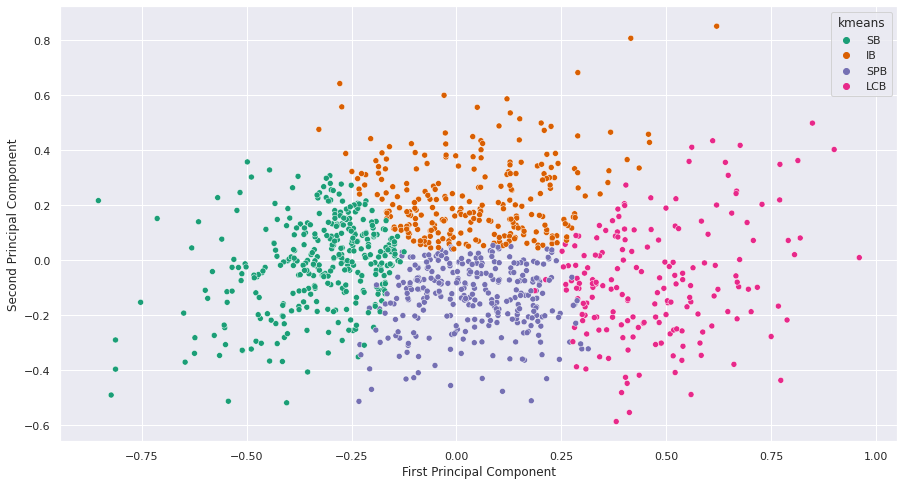

array([ True,  True,  True,  True,  True,  True,  True,  True])

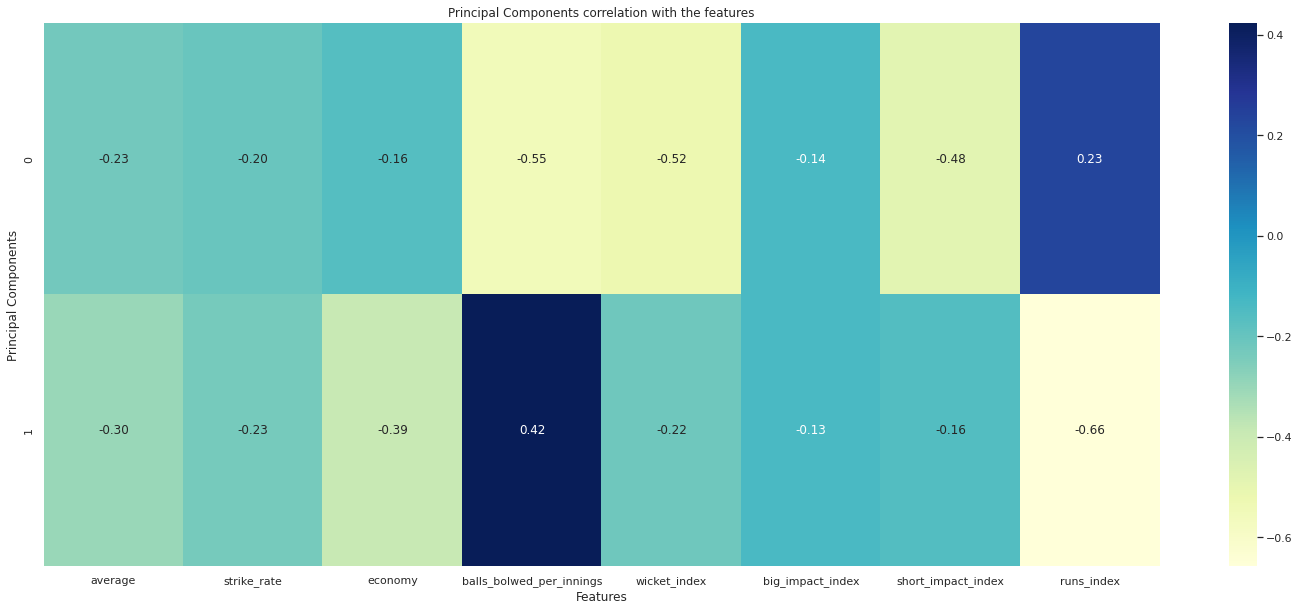

In [93]:
pca = PCA(n_components=2)

pca.fit(bowler_for_clustering_scaled)

x_pca = pca.transform(bowler_for_clustering_scaled)

print(bowler_for_clustering_scaled.shape)

print(x_pca.shape)

fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=results['kmeans'].map({0:'SB',1:'SPB',2:'LCB',3:'IB'}),palette='Dark2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

df = pd.DataFrame(pca.components_ , columns=columns)

fig = plt.figure(figsize=(25, 10))
sns.heatmap(df,cmap='YlGnBu',annot=True,fmt=".2f")
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
selector.fit_transform(bowler_for_clustering_scaled)

selector.get_support()

In [94]:
pca.explained_variance_

array([0.09169404, 0.04226535])

In [95]:
pca.explained_variance_ratio_

array([0.52279883, 0.2409783 ])

In [96]:
dict_pca = dict(zip(columns,np.round(pca.components_[0],3)))
dict_pca

{'average': -0.225,
 'strike_rate': -0.205,
 'economy': -0.163,
 'balls_bolwed_per_innings': -0.552,
 'wicket_index': -0.52,
 'big_impact_index': -0.137,
 'short_impact_index': -0.483,
 'runs_index': 0.232}

In [97]:
final_index['pca_score'] = 0
for i in columns:
  final_index['pca_score'] = np.round(final_index['pca_score'] + (final_index[i] * dict_pca.get(i)),3)

In [98]:
final_index[final_index.country.isin(top10countries)].sort_values('pca_score').head(10).drop(['rfc_score','xgb_score','voting_score','rbml_score'],axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,pca_score
653,T Natarajan,INDIA,0.941,0.945,0.595,1.000,0.688,0.000,0.778,0.332,0,-1.712
289,CK Langeveldt,SA,0.958,0.961,0.626,0.889,0.745,0.277,0.722,0.441,0,-1.678
661,Sayed Shirzad,AFG,0.945,0.952,0.585,0.917,0.688,0.000,0.778,0.376,0,-1.656
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,-1.643
467,L Balaji,INDIA,0.970,0.977,0.601,0.733,0.792,0.000,0.889,0.517,0,-1.642
80,Kuldeep Yadav,INDIA,0.955,0.954,0.648,0.903,0.701,0.217,0.677,0.455,0,-1.631
431,Zulfiqar Babar,PAK,0.952,0.951,0.644,0.905,0.672,0.000,0.762,0.451,0,-1.626
26,PWH de Silva,SL,0.959,0.952,0.692,0.893,0.676,0.140,0.706,0.512,0,-1.610
285,AB Dinda,INDIA,0.957,0.970,0.544,0.778,0.745,0.277,0.722,0.428,0,-1.607
580,RP Meredith,AUS,0.908,0.942,0.369,0.900,0.625,0.000,0.711,0.123,0,-1.593


In [99]:
train_index = final_index[['name','country','kmeans','rfc_score','xgb_score','voting_score','rbml_score','pca_score']][final_index.country.isin(top10countries)]
train_index['kmeans_role'] = train_index['kmeans'].map({0:'SB',1:'SPB',2:'LCB',3:'IB'})
train_index['pca_score'] = train_index['pca_score'] * -1 
train_index.drop('kmeans',axis=1)[(train_index.country.isin(top10countries))].sort_values('rbml_score',ascending=False).head(10)

,name,country,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
467,L Balaji,INDIA,0.763,0.766,0.755,0.785,1.642,SB
653,T Natarajan,INDIA,0.751,0.732,0.740,0.771,1.712,SB
289,CK Langeveldt,SA,0.757,0.753,0.753,0.770,1.678,SB
2,Rashid Khan,AFG,0.777,0.770,0.775,0.769,1.643,SB
661,Sayed Shirzad,AFG,0.741,0.727,0.730,0.757,1.656,SB
431,Zulfiqar Babar,PAK,0.751,0.738,0.742,0.754,1.626,SB
80,Kuldeep Yadav,INDIA,0.749,0.742,0.745,0.753,1.631,SB
26,PWH de Silva,SL,0.758,0.748,0.752,0.752,1.610,SB
285,AB Dinda,INDIA,0.724,0.728,0.719,0.745,1.607,SB
510,Fazalhaq Farooqi,AFG,0.774,0.753,0.766,0.742,1.578,SB


In [100]:
train_index.drop('kmeans',axis=1)[(train_index.country.isin(top10countries))].sort_values('rbml_score').head(10)

,name,country,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
1077,RG Sharma,INDIA,0.301,0.310,0.304,0.211,0.135,LCB
1070,JL Ontong,SA,0.314,0.329,0.317,0.247,0.324,LCB
1078,JT Smuts,SA,0.269,0.254,0.277,0.280,0.193,LCB
1055,Iftikhar Ahmed,PAK,0.355,0.357,0.359,0.290,0.290,LCB
1082,CL White,AUS,0.423,0.435,0.419,0.302,0.345,LCB
1045,CD Barnwell,WI,0.420,0.430,0.416,0.312,0.392,LCB
1068,Nazmul Hossain,BAN,0.392,0.398,0.390,0.316,0.420,LCB
1066,EMDY Munaweera,SL,0.366,0.361,0.364,0.322,0.402,LCB
861,Hussain Talat,PAK,0.497,0.531,0.493,0.334,0.535,LCB
940,GSNFG Jayasuriya,SL,0.398,0.396,0.396,0.349,0.493,LCB


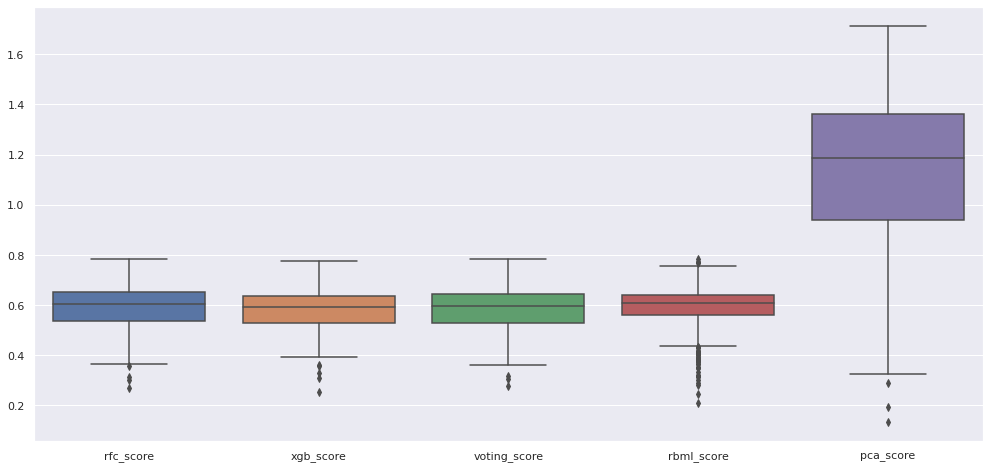

In [101]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=train_index[['rfc_score','xgb_score','voting_score','rbml_score','pca_score']])
plt.show()

In [102]:
final_index

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score,pca_score
0,Shakib Al Hasan,BAN,0.927,0.913,0.686,0.910,0.480,0.158,0.469,0.496,0,0.687,0.671,0.682,0.646,-1.394
1,TG Southee,NZ,0.902,0.913,0.541,0.898,0.472,0.055,0.515,0.337,0,0.647,0.627,0.638,0.629,-1.398
2,Rashid Khan,AFG,0.965,0.953,0.739,0.930,0.703,0.245,0.671,0.545,0,0.777,0.770,0.775,0.769,-1.643
3,SL Malinga,SL,0.922,0.921,0.615,0.869,0.495,0.090,0.516,0.440,0,0.671,0.657,0.664,0.643,-1.392
4,Shahid Afridi,PAK,0.902,0.880,0.690,0.908,0.379,0.078,0.407,0.502,0,0.655,0.633,0.649,0.598,-1.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,0.676,0.641,0.610,0.375,0.062,0.000,0.111,0.743,2,0.430,0.425,0.427,0.374,-0.503
1081,JJ Tucker,BMUDA,0.698,0.726,0.477,0.250,0.062,0.000,0.111,0.772,2,0.408,0.413,0.405,0.326,-0.429
1082,CL White,AUS,0.758,0.726,0.628,0.133,0.042,0.000,0.089,0.928,2,0.423,0.435,0.419,0.302,-0.345
1083,Zahid Khan,SLE,0.627,0.587,0.607,0.500,0.062,0.000,0.111,0.677,2,0.433,0.421,0.431,0.409,-0.565


# Training Evaluation

In [103]:
from pathlib import Path

In [104]:
final_training_evaluation = bowler.copy()

In [105]:
final_training_evaluation = pd.merge(final_training_evaluation,final_index[['name','country','kmeans','rbml_score','pca_score']],on=['name','country'],how='left')

In [106]:
final_training_evaluation

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,Shakib Al Hasan,BAN,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905,22.100,Best,0,0.646,-1.394
1,TG Southee,NZ,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322,33.552,Good,0,0.629,-1.398
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246,13.260,Best,0,0.769,-1.643
3,SL Malinga,SL,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807,25.710,Best,0,0.643,-1.392
4,Shahid Afridi,PAK,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701,27.006,Best,0,0.598,-1.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500,82.170,Poor,2,0.374,-0.503
1081,JJ Tucker,BMUDA,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500,91.450,Poor,2,0.326,-0.429
1082,CL White,AUS,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200,61.880,Poor,2,0.302,-0.345
1083,Zahid Khan,SLE,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750,93.750,Poor,2,0.409,-0.565


## Analysis

In [107]:
final_training_evaluation['pca_score'] = final_training_evaluation['pca_score'] * -1 
final_training_evaluation['kmeans_role'] = final_training_evaluation['kmeans'].map({0:'SB',1:'SPB',2:'LCB',3:'IB'})

In [108]:
cols_final = final_training_evaluation.columns.tolist()
cols_final = ['name','country','average','strike_rate','economy','balls_bolwed_per_innings','wicket_index','big_impact_index','short_impact_index','runs_index','prelim_metric','pre-rank','kmeans','kmeans_role','rbml_score','pca_score']

In [109]:
final_training_evaluation = final_training_evaluation[cols_final]

In [110]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 0)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
467,L Balaji,INDIA,12.10,9.6,7.56,19.200,2.000,0.000,2.000,24.200,15.246,Good,0,SB,0.785,1.642
653,T Natarajan,INDIA,17.42,13.7,7.62,24.000,1.750,0.000,1.750,30.500,22.123,Good,0,SB,0.771,1.712
289,CK Langeveldt,SA,14.17,11.6,7.30,22.000,1.889,0.111,1.625,26.778,17.240,Good,0,SB,0.770,1.678
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246,13.260,Best,0,SB,0.769,1.643
661,Sayed Shirzad,AFG,16.57,12.8,7.73,22.500,1.750,0.000,1.750,29.000,21.348,Good,0,SB,0.757,1.656
431,Zulfiqar Babar,PAK,15.41,13.0,7.11,22.286,1.714,0.000,1.714,26.429,18.261,Good,0,SB,0.754,1.626
80,Kuldeep Yadav,INDIA,14.75,12.5,7.07,22.252,1.783,0.087,1.524,26.304,17.380,Best,0,SB,0.753,1.631
26,PWH de Silva,SL,14.14,12.8,6.61,22.067,1.722,0.056,1.588,24.361,15.578,Best,0,SB,0.752,1.610
285,AB Dinda,INDIA,14.41,10.5,8.16,20.000,1.889,0.111,1.625,27.222,19.598,Good,0,SB,0.745,1.607
510,Fazalhaq Farooqi,AFG,14.88,16.0,5.58,24.000,1.500,0.000,1.500,22.333,13.838,Good,0,SB,0.742,1.578


In [111]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 1)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
769,JA Duffy,NZ,15.00,15.6,5.76,19.500,1.250,0.250,0.333,18.750,14.400,Good,1,SPB,0.684,1.195
695,RL Chase,WI,14.16,14.3,5.93,17.040,1.200,0.000,1.200,17.000,13.995,Good,1,SPB,0.683,1.196
564,Fawad Alam,PAK,11.87,11.2,6.33,15.000,1.333,0.000,1.333,15.833,12.523,Good,1,SPB,0.674,1.185
41,Imad Wasim,PAK,23.49,22.2,6.33,21.474,0.965,0.035,0.836,22.667,24.782,Best,1,SPB,0.664,1.225
57,AC Agar,AUS,22.29,20.6,6.48,21.052,1.022,0.043,0.818,22.783,24.073,Best,1,SPB,0.660,1.226
356,BC Fortuin,SA,19.28,17.5,6.58,18.923,1.077,0.000,1.077,20.769,21.144,Good,1,SPB,0.659,1.206
719,JM Muirhead,AUS,18.16,15.0,7.26,18.000,1.200,0.000,1.200,21.800,21.974,Good,1,SPB,0.646,1.233
640,S Randiv,SL,19.85,18.0,6.61,18.000,1.000,0.000,1.000,19.857,21.868,Good,1,SPB,0.644,1.137
250,NW Bracken,AUS,23.05,19.8,6.97,19.737,1.000,0.000,1.000,23.053,26.776,Good,1,SPB,0.639,1.198
172,Mahedi Hasan,BAN,26.44,24.3,6.51,20.260,0.833,0.000,0.833,22.033,28.687,Best,1,SPB,0.638,1.132


In [112]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 3)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
317,M Theekshana,SL,27.37,25.5,6.44,22.667,0.889,0.00,0.889,24.333,29.377,Good,3,IB,0.673,1.245
462,MH Yardy,ENG,27.18,25.0,6.50,21.231,0.846,0.00,0.846,23.000,29.445,Good,3,IB,0.667,1.174
43,Sohail Tanvir,PAK,26.92,22.4,7.18,21.284,0.947,0.00,0.947,25.509,32.214,Good,3,IB,0.653,1.229
269,CRD Fernando,SL,25.77,21.0,7.36,21.000,1.000,0.00,1.000,25.778,31.611,Good,3,IB,0.653,1.244
53,RA Jadeja,INDIA,27.45,23.3,7.04,20.046,0.857,0.00,0.857,23.536,32.208,Good,3,IB,0.653,1.139
771,A Flintoff,ENG,32.20,30.0,6.44,21.429,0.714,0.00,0.714,23.000,34.561,Good,3,IB,0.650,1.109
761,Azmatullah Omarzai,AFG,24.60,19.2,7.68,19.200,1.000,0.00,1.000,24.600,31.488,Good,3,IB,0.648,1.181
55,SR Watson,AUS,24.72,19.3,7.65,18.980,0.980,0.02,0.917,24.224,31.518,Good,3,IB,0.648,1.158
474,MR Gillespie,NZ,25.50,21.0,7.28,21.000,1.000,0.10,0.667,25.500,30.940,Good,3,IB,0.646,1.207
99,Shapoor Zadran,AFG,24.51,18.7,7.83,19.250,1.028,0.00,1.028,25.194,31.986,Good,3,IB,0.646,1.198


In [113]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries)) & (final_training_evaluation.kmeans == 2)].sort_values('rbml_score',ascending = False).head(10)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
655,SR Patel,ENG,45.85,36.0,7.64,16.800,0.467,0.000,0.467,21.400,58.382,Average,2,LCB,0.491,0.804
359,Karim Sadiq,AFG,34.42,30.0,6.88,15.000,0.500,0.000,0.500,17.214,39.468,Good,2,LCB,0.480,0.770
415,JH Kallis,SA,27.75,23.0,7.23,14.526,0.632,0.053,0.444,17.526,33.439,Good,2,LCB,0.479,0.806
236,Gulbadin Naib,AFG,34.40,25.2,8.17,14.841,0.588,0.000,0.588,20.235,46.841,Average,2,LCB,0.473,0.811
630,MC Henriques,AUS,27.71,19.7,8.43,13.800,0.700,0.000,0.700,19.400,38.933,Good,2,LCB,0.472,0.833
412,C de Grandhomme,NZ,38.41,26.7,8.61,15.229,0.571,0.000,0.571,21.952,55.118,Average,2,LCB,0.471,0.813
103,GJ Maxwell,AUS,27.80,22.3,7.47,13.627,0.610,0.000,0.610,16.966,34.611,Good,2,LCB,0.468,0.785
791,AK Markram,SA,26.80,21.6,7.44,13.500,0.625,0.000,0.625,16.750,33.232,Good,2,LCB,0.467,0.788
235,CH Gayle,WI,22.00,19.0,6.92,12.660,0.667,0.000,0.667,14.667,25.373,Good,2,LCB,0.467,0.784
234,JEC Franklin,NZ,20.85,16.3,7.65,12.531,0.769,0.038,0.640,16.038,26.584,Good,2,LCB,0.463,0.813


In [114]:
final_training_evaluation[(final_training_evaluation.country.isin(top10countries))].sort_values('pca_score',ascending = False).drop(['rbml_score','kmeans'],axis=1).head(15)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans_role,pca_score
653,T Natarajan,INDIA,17.42,13.7,7.62,24.000,1.750,0.000,1.750,30.500,22.123,Good,SB,1.712
289,CK Langeveldt,SA,14.17,11.6,7.30,22.000,1.889,0.111,1.625,26.778,17.240,Good,SB,1.678
661,Sayed Shirzad,AFG,16.57,12.8,7.73,22.500,1.750,0.000,1.750,29.000,21.348,Good,SB,1.656
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246,13.260,Best,SB,1.643
467,L Balaji,INDIA,12.10,9.6,7.56,19.200,2.000,0.000,2.000,24.200,15.246,Good,SB,1.642
80,Kuldeep Yadav,INDIA,14.75,12.5,7.07,22.252,1.783,0.087,1.524,26.304,17.380,Best,SB,1.631
431,Zulfiqar Babar,PAK,15.41,13.0,7.11,22.286,1.714,0.000,1.714,26.429,18.261,Good,SB,1.626
26,PWH de Silva,SL,14.14,12.8,6.61,22.067,1.722,0.056,1.588,24.361,15.578,Best,SB,1.610
285,AB Dinda,INDIA,14.41,10.5,8.16,20.000,1.889,0.111,1.625,27.222,19.598,Good,SB,1.607
580,RP Meredith,AUS,23.50,14.1,9.98,22.200,1.600,0.000,1.600,37.600,39.088,Good,SB,1.593


In [115]:
filepath_bowler_evaluation_train = Path('final_training_evaluation_bowler.csv') 
final_training_evaluation.drop('kmeans',axis=1).to_csv(filepath_bowler_evaluation_train,index=False)

# Test Evaluation

In [116]:
bowler_test = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/bowlers_test.csv')

In [117]:
 bowler_test

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank
0,S Dube,INDIA,43.20,25.8,10.04,11.618,0.455,0.0,0.455,19.636,72.288,Poor
1,S Appu,MLT,24.66,18.0,8.22,13.500,0.750,0.0,0.750,18.500,33.784,Poor
2,TM Head,AUS,56.00,36.0,9.33,9.000,0.250,0.0,0.250,14.000,87.080,Poor
3,L Evile,Samoa,22.33,24.0,5.58,18.000,0.750,0.0,0.750,16.750,20.767,Poor
4,EB Ringera,KENYA,16.71,15.1,6.62,21.120,1.400,0.2,0.750,23.400,18.437,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Yasir Ali,ESP,14.75,14.8,5.94,16.886,1.143,0.0,1.143,16.857,14.603,Good
78,Nawaf Ahmed,KUW,36.00,30.0,7.20,12.000,0.400,0.0,0.400,14.400,43.200,Poor
79,C Smith,IOM,25.00,24.0,6.25,18.000,0.750,0.0,0.750,18.750,26.042,Poor
80,Mohammad Nawaz,Den,27.76,23.2,7.15,19.400,0.833,0.0,0.833,23.133,33.081,Good


In [118]:
bowler_test_for_clustering = bowler_test.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
bowler_test_for_clustering

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,43.20,25.8,10.04,11.618,0.455,0.0,0.455,19.636
1,24.66,18.0,8.22,13.500,0.750,0.0,0.750,18.500
2,56.00,36.0,9.33,9.000,0.250,0.0,0.250,14.000
3,22.33,24.0,5.58,18.000,0.750,0.0,0.750,16.750
4,16.71,15.1,6.62,21.120,1.400,0.2,0.750,23.400
...,...,...,...,...,...,...,...,...
77,14.75,14.8,5.94,16.886,1.143,0.0,1.143,16.857
78,36.00,30.0,7.20,12.000,0.400,0.0,0.400,14.400
79,25.00,24.0,6.25,18.000,0.750,0.0,0.750,18.750
80,27.76,23.2,7.15,19.400,0.833,0.0,0.833,23.133


In [119]:
bowler_test_for_clustering_scaled = pd.DataFrame()

In [120]:
bowler_test_for_clustering_scaled['average'] = ((np.max(bowler_test_for_clustering['average'])) - bowler_test_for_clustering['average']) / (np.max(bowler_test_for_clustering['average']) - np.min(bowler_test_for_clustering['average']))
bowler_test_for_clustering_scaled['strike_rate'] = ((np.max(bowler_test_for_clustering['strike_rate'])) - bowler_test_for_clustering['strike_rate']) / (np.max(bowler_test_for_clustering['strike_rate']) - np.min(bowler_test_for_clustering['strike_rate']))
bowler_test_for_clustering_scaled['economy'] = ((np.max(bowler_test_for_clustering['economy'])) - bowler_test_for_clustering['economy']) / (np.max(bowler_test_for_clustering['economy']) - np.min(bowler_test_for_clustering['economy']))
bowler_test_for_clustering_scaled['runs_index'] = ((np.max(bowler_test_for_clustering['runs_index'])) - bowler_test_for_clustering['runs_index']) / (np.max(bowler_test_for_clustering['runs_index']) - np.min(bowler_test_for_clustering['runs_index']))


bowler_test_for_clustering_scaled['balls_bolwed_per_innings'] = (bowler_test_for_clustering['balls_bolwed_per_innings'] - np.min(bowler_test_for_clustering['balls_bolwed_per_innings'])) / (np.max(bowler_test_for_clustering['balls_bolwed_per_innings']) - np.min(bowler_test_for_clustering['balls_bolwed_per_innings']))
bowler_test_for_clustering_scaled['wicket_index'] = (bowler_test_for_clustering['wicket_index'] - np.min(bowler_test_for_clustering['wicket_index'])) / (np.max(bowler_test_for_clustering['wicket_index']) - np.min(bowler_test_for_clustering['wicket_index']))
bowler_test_for_clustering_scaled['big_impact_index'] = (bowler_test_for_clustering['big_impact_index'] - np.min(bowler_test_for_clustering['big_impact_index'])) / (np.max(bowler_test_for_clustering['big_impact_index']) - np.min(bowler_test_for_clustering['big_impact_index']))
bowler_test_for_clustering_scaled['short_impact_index'] = (bowler_test_for_clustering['short_impact_index'] - np.min(bowler_test_for_clustering['short_impact_index'])) / (np.max(bowler_test_for_clustering['short_impact_index']) - np.min(bowler_test_for_clustering['short_impact_index']))


In [121]:
bowler_test_for_clustering_scaled = pd.DataFrame(bowler_test_for_clustering_scaled,columns = columns)
bowler_test_for_clustering_scaled

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,0.318548,0.509434,0.199319,0.174533,0.117143,0.0,0.126625,0.648079
1,0.692339,0.754717,0.509370,0.300000,0.285714,0.0,0.293386,0.693069
2,0.060484,0.188679,0.320273,0.000000,0.000000,0.0,0.010741,0.871287
3,0.739315,0.566038,0.959114,0.600000,0.285714,0.0,0.293386,0.762376
4,0.852621,0.845912,0.781942,0.808000,0.657143,1.0,0.293386,0.499010
...,...,...,...,...,...,...,...,...
77,0.892137,0.855346,0.897785,0.525733,0.510286,0.0,0.515546,0.758139
78,0.463710,0.377358,0.683135,0.200000,0.085714,0.0,0.095534,0.855446
79,0.685484,0.566038,0.844974,0.600000,0.285714,0.0,0.293386,0.683168
80,0.629839,0.591195,0.691652,0.693333,0.333143,0.0,0.340305,0.509584


In [122]:
bowler_test_scaled = bowler_test_for_clustering_scaled.copy()
bowler_test_scaled['name'] = bowler_test['name']
bowler_test_scaled['country'] = bowler_test['country']

cols = bowler_test_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


bowler_test_scaled = bowler_test_scaled [cols]
bowler_test_scaled

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,S Dube,INDIA,0.318548,0.509434,0.199319,0.174533,0.117143,0.0,0.126625,0.648079
1,S Appu,MLT,0.692339,0.754717,0.509370,0.300000,0.285714,0.0,0.293386,0.693069
2,TM Head,AUS,0.060484,0.188679,0.320273,0.000000,0.000000,0.0,0.010741,0.871287
3,L Evile,Samoa,0.739315,0.566038,0.959114,0.600000,0.285714,0.0,0.293386,0.762376
4,EB Ringera,KENYA,0.852621,0.845912,0.781942,0.808000,0.657143,1.0,0.293386,0.499010
...,...,...,...,...,...,...,...,...,...,...
77,Yasir Ali,ESP,0.892137,0.855346,0.897785,0.525733,0.510286,0.0,0.515546,0.758139
78,Nawaf Ahmed,KUW,0.463710,0.377358,0.683135,0.200000,0.085714,0.0,0.095534,0.855446
79,C Smith,IOM,0.685484,0.566038,0.844974,0.600000,0.285714,0.0,0.293386,0.683168
80,Mohammad Nawaz,Den,0.629839,0.591195,0.691652,0.693333,0.333143,0.0,0.340305,0.509584


In [123]:
ypred_test = kmodel.predict(bowler_test_for_clustering_scaled)
results_test = bowler_test_scaled
results_test['kmeans'] = ypred_test

In [124]:
results_mid = results_test.copy()
final_test_index = results_test.copy()
middle_ovr = pd.DataFrame()


In [125]:
results_0 = results_mid[results_mid['kmeans'] == 0]
results_1 = results_mid[results_mid['kmeans'] == 1]
results_2 = results_mid[results_mid['kmeans'] == 2]
results_3 = results_mid[results_mid['kmeans'] == 3]

### For 0

In [126]:
results_0['rbml_score'] = 0
for i in columns:
  results_0['rbml_score'] = np.round(results_0['rbml_score'] + (results_0[i] * dict_0.get(i)),3)

In [127]:
middle_ovr = results_0.copy()

### For 1


In [128]:
results_1['rbml_score'] = 0
for i in columns:
  results_1['rbml_score'] = np.round(results_1['rbml_score'] + (results_1[i] * dict_1.get(i)),3)

In [129]:
middle_ovr = middle_ovr.append(results_1)

### For 2


In [130]:
results_2['rbml_score'] = 0
for i in columns:
  results_2['rbml_score'] = np.round(results_2['rbml_score'] + (results_2[i] * dict_2.get(i)),3)

In [131]:
middle_ovr = middle_ovr.append(results_2)

### For 3

In [132]:
results_3['rbml_score'] = 0
for i in columns:
  results_3['rbml_score'] = np.round(results_3['rbml_score'] + (results_3[i] * dict_3.get(i)),3)

In [133]:
middle_ovr = middle_ovr.append(results_3)

In [134]:
middle_ovr

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
4,EB Ringera,KENYA,0.852621,0.845912,0.781942,0.808000,0.657143,1.000,0.293386,0.499010,0,0.653
6,Mudassar Bukhari,NED,0.823992,0.808176,0.778535,0.739400,0.559429,0.430,0.417185,0.543129,0,0.619
8,NSK Mehta,Belg,0.755242,0.723270,0.756388,0.955533,0.555429,0.000,0.560204,0.382851,0,0.652
10,YS Chahal,INDIA,0.680444,0.745283,0.507666,0.946667,0.578857,0.265,0.476540,0.162574,0,0.619
12,IKO Aboagye,Ghana,0.910685,0.880503,0.901193,0.800000,0.714286,0.000,0.717354,0.603960,0,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...
64,Qadeer Ahmed,UAE,0.622782,0.650943,0.563884,0.680000,0.371429,0.000,0.378180,0.423762,3,0.528
67,K Nestor,GIBR,0.133669,0.251572,0.335605,0.691400,0.183429,0.000,0.192199,0.240436,3,0.279
70,V Zimonjic,SRB,0.635081,0.707547,0.468484,0.700000,0.428571,0.000,0.434709,0.336634,3,0.517
74,Fakhrul Mohon,PORT,0.332661,0.000000,0.875639,0.800000,0.142857,0.000,0.152063,0.584158,3,0.444


In [135]:
final_test_index = pd.merge(final_test_index,middle_ovr[['name','country','rbml_score']],on=['name','country'],how='left')

In [136]:
final_test_index

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
0,S Dube,INDIA,0.318548,0.509434,0.199319,0.174533,0.117143,0.0,0.126625,0.648079,2,0.238
1,S Appu,MLT,0.692339,0.754717,0.509370,0.300000,0.285714,0.0,0.293386,0.693069,2,0.403
2,TM Head,AUS,0.060484,0.188679,0.320273,0.000000,0.000000,0.0,0.010741,0.871287,2,0.126
3,L Evile,Samoa,0.739315,0.566038,0.959114,0.600000,0.285714,0.0,0.293386,0.762376,1,0.617
4,EB Ringera,KENYA,0.852621,0.845912,0.781942,0.808000,0.657143,1.0,0.293386,0.499010,0,0.653
...,...,...,...,...,...,...,...,...,...,...,...,...
77,Yasir Ali,ESP,0.892137,0.855346,0.897785,0.525733,0.510286,0.0,0.515546,0.758139,1,0.678
78,Nawaf Ahmed,KUW,0.463710,0.377358,0.683135,0.200000,0.085714,0.0,0.095534,0.855446,2,0.289
79,C Smith,IOM,0.685484,0.566038,0.844974,0.600000,0.285714,0.0,0.293386,0.683168,1,0.579
80,Mohammad Nawaz,Den,0.629839,0.591195,0.691652,0.693333,0.333143,0.0,0.340305,0.509584,3,0.552


### PCA Metric

In [137]:
final_test_index['pca_score'] = 0
for i in columns:
  final_test_index['pca_score'] = np.round(final_test_index['pca_score'] + (final_test_index[i] * dict_pca.get(i)),3)

In [138]:
final_test_index

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score,pca_score
0,S Dube,INDIA,0.318548,0.509434,0.199319,0.174533,0.117143,0.0,0.126625,0.648079,2,0.238,-0.276
1,S Appu,MLT,0.692339,0.754717,0.509370,0.300000,0.285714,0.0,0.293386,0.693069,2,0.403,-0.690
2,TM Head,AUS,0.060484,0.188679,0.320273,0.000000,0.000000,0.0,0.010741,0.871287,2,0.126,0.092
3,L Evile,Samoa,0.739315,0.566038,0.959114,0.600000,0.285714,0.0,0.293386,0.762376,1,0.617,-0.883
4,EB Ringera,KENYA,0.852621,0.845912,0.781942,0.808000,0.657143,1.0,0.293386,0.499010,0,0.653,-1.443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Yasir Ali,ESP,0.892137,0.855346,0.897785,0.525733,0.510286,0.0,0.515546,0.758139,1,0.678,-1.150
78,Nawaf Ahmed,KUW,0.463710,0.377358,0.683135,0.200000,0.085714,0.0,0.095534,0.855446,2,0.289,-0.295
79,C Smith,IOM,0.685484,0.566038,0.844974,0.600000,0.285714,0.0,0.293386,0.683168,1,0.579,-0.872
80,Mohammad Nawaz,Den,0.629839,0.591195,0.691652,0.693333,0.333143,0.0,0.340305,0.509584,3,0.552,-0.978


# Test Evaluation Final

In [139]:
final_evaluation_index = bowler_test.copy()

In [140]:
final_evaluation_index = pd.merge(final_evaluation_index,final_test_index[['name','country','kmeans','rbml_score','pca_score']],on=['name','country'],how='left')

In [141]:
final_evaluation_index

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,S Dube,INDIA,43.20,25.8,10.04,11.618,0.455,0.0,0.455,19.636,72.288,Poor,2,0.238,-0.276
1,S Appu,MLT,24.66,18.0,8.22,13.500,0.750,0.0,0.750,18.500,33.784,Poor,2,0.403,-0.690
2,TM Head,AUS,56.00,36.0,9.33,9.000,0.250,0.0,0.250,14.000,87.080,Poor,2,0.126,0.092
3,L Evile,Samoa,22.33,24.0,5.58,18.000,0.750,0.0,0.750,16.750,20.767,Poor,1,0.617,-0.883
4,EB Ringera,KENYA,16.71,15.1,6.62,21.120,1.400,0.2,0.750,23.400,18.437,Good,0,0.653,-1.443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Yasir Ali,ESP,14.75,14.8,5.94,16.886,1.143,0.0,1.143,16.857,14.603,Good,1,0.678,-1.150
78,Nawaf Ahmed,KUW,36.00,30.0,7.20,12.000,0.400,0.0,0.400,14.400,43.200,Poor,2,0.289,-0.295
79,C Smith,IOM,25.00,24.0,6.25,18.000,0.750,0.0,0.750,18.750,26.042,Poor,1,0.579,-0.872
80,Mohammad Nawaz,Den,27.76,23.2,7.15,19.400,0.833,0.0,0.833,23.133,33.081,Good,3,0.552,-0.978


In [142]:
final_evaluation_index['pca_score'] = final_evaluation_index['pca_score'] * -1 
final_evaluation_index['kmeans_role'] = final_evaluation_index['kmeans'].map({0:'SB',1:'SPB',2:'LCB',3:'IB'})

In [143]:
final_evaluation_index = final_evaluation_index[cols_final]

In [144]:
final_evaluation_index[final_evaluation_index['pre-rank'] == 'Best']

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
6,Mudassar Bukhari,NED,18.13,16.3,6.64,20.091,1.229,0.086,0.969,22.286,20.064,Best,0,SB,0.619,1.312
16,DP Nannes,AUS/NED,16.39,13.0,7.52,22.875,1.750,0.062,1.600,28.688,20.542,Best,0,SB,0.797,1.788
21,Waseem Abbas,MLT,18.94,15.3,7.39,21.429,1.393,0.071,1.154,26.393,23.328,Best,0,SB,0.667,1.470
30,Amir Hamza,AFG,25.06,22.2,6.77,20.182,0.909,0.000,0.909,22.788,28.276,Best,3,IB,0.590,1.076
31,Shadab Khan,PAK,21.79,18.3,7.11,22.330,1.217,0.033,1.121,26.517,25.821,Best,0,SB,0.630,1.393
43,Shoriful Islam,BAN,18.40,14.8,7.45,19.389,1.316,0.000,1.316,24.211,22.847,Best,0,SB,0.643,1.350
45,Umar Gul,PAK,16.97,14.1,7.19,20.030,1.417,0.100,1.093,24.050,20.336,Best,0,SB,0.663,1.429
49,J Botha,SA,22.24,20.9,6.37,19.846,0.949,0.000,0.949,21.103,23.611,Best,1,SPB,0.623,1.103
54,L Ngidi,SA,19.61,13.1,8.95,20.478,1.565,0.043,1.455,30.696,29.252,Best,0,SB,0.696,1.555
58,DT Johnston,IRE,19.87,18.5,6.42,21.214,1.143,0.036,1.037,22.714,21.261,Best,0,SB,0.612,1.299


In [145]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
51,Shagharai Sefat,Belg,9.40,10.2,5.52,20.400,2.000,0.000,2.000,18.800,8.648,Good,0,SB,0.900,1.853
55,A Neill,SCOT,17.11,13.3,7.70,24.000,1.800,0.000,1.800,30.800,21.958,Good,0,SB,0.826,1.865
16,DP Nannes,AUS/NED,16.39,13.0,7.52,22.875,1.750,0.062,1.600,28.688,20.542,Best,0,SB,0.797,1.788
32,A Mishra,INDIA,15.00,14.2,6.31,22.800,1.600,0.000,1.600,24.000,15.775,Good,0,SB,0.783,1.688
20,S Thakor,TAN,13.26,14.8,5.37,22.200,1.500,0.000,1.500,19.900,11.868,Good,0,SB,0.767,1.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,TM Dilshan,SL,34.77,28.6,7.27,10.320,0.360,0.000,0.360,12.520,42.130,Average,2,LCB,0.250,0.206
5,GD Phillips,NZ,34.00,25.5,8.00,9.960,0.400,0.000,0.400,13.600,45.333,Poor,2,LCB,0.242,0.228
0,S Dube,INDIA,43.20,25.8,10.04,11.618,0.455,0.000,0.455,19.636,72.288,Poor,2,LCB,0.238,0.276
57,C Munro,NZ,46.50,29.5,9.45,9.700,0.333,0.000,0.333,15.500,73.238,Poor,2,LCB,0.177,0.078


In [146]:
final_evaluation_index['pre-rank'].value_counts()

Good       43
Poor       21
Best       11
Average     7
Name: pre-rank, dtype: int64

In [147]:
final_evaluation_index['kmeans_role'].value_counts()

SB     31
LCB    20
IB     20
SPB    11
Name: kmeans_role, dtype: int64

In [148]:
final_evaluation_index[(final_evaluation_index['kmeans_role'] != 'LCB') & (final_evaluation_index['pre-rank'] == 'Poor') ]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
3,L Evile,Samoa,22.33,24.0,5.58,18.000,0.750,0.0,0.750,16.750,20.767,Poor,1,SPB,0.617,0.883
24,Aslam Mohammad,GRC,25.75,21.0,7.35,21.000,1.000,0.0,1.000,25.750,31.544,Poor,3,IB,0.569,1.174
27,Asad Ali Rehemtulla,BUL,45.50,30.0,9.10,17.143,0.571,0.0,0.571,26.000,69.008,Poor,3,IB,0.346,0.593
39,PR Brown,ENG,42.66,26.0,9.84,19.500,0.750,0.0,0.750,32.000,69.962,Poor,3,IB,0.335,0.855
44,Abul Hasan,BAN,37.00,21.0,10.57,16.800,0.800,0.0,0.800,29.600,65.182,Poor,3,IB,0.371,0.799
48,R Shepherd,WI,35.92,19.2,11.21,19.071,1.000,0.0,1.000,35.929,67.111,Poor,3,IB,0.347,1.055
67,K Nestor,GIBR,52.37,34.0,9.24,19.371,0.571,0.0,0.571,29.929,80.650,Poor,3,IB,0.279,0.651
70,V Zimonjic,SRB,27.50,19.5,8.46,19.500,1.000,0.0,1.000,27.500,38.775,Poor,3,IB,0.517,1.105
74,Fakhrul Mohon,PORT,42.50,42.0,6.07,21.000,0.500,0.0,0.500,21.250,42.996,Poor,3,IB,0.444,0.671
79,C Smith,IOM,25.00,24.0,6.25,18.000,0.750,0.0,0.750,18.750,26.042,Poor,1,SPB,0.579,0.872


In [149]:
final_evaluation_index[(final_evaluation_index['kmeans_role'] == 'LCB') & (final_evaluation_index['pre-rank'] != 'Poor') ]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
9,TM Dilshan,SL,34.77,28.6,7.27,10.320,0.360,0.000,0.360,12.520,42.130,Average,2,LCB,0.250,0.206
14,A Bishnoi,MLT,29.20,19.8,8.84,13.971,0.714,0.000,0.714,20.857,43.021,Average,2,LCB,0.383,0.658
22,D Muhumuza,UGA,21.41,19.3,6.64,14.400,0.750,0.062,0.467,16.062,23.694,Good,2,LCB,0.433,0.715
29,AD Mathews,SL,31.57,27.0,6.99,16.849,0.623,0.000,0.623,19.672,36.779,Good,2,LCB,0.448,0.695
50,RD Berrington,SCOT,23.96,18.9,7.58,12.780,0.675,0.000,0.675,16.175,30.269,Good,2,LCB,0.384,0.613
59,SNJ O'Keefe,AUS,24.83,19.0,7.84,16.286,0.857,0.000,0.857,21.286,32.445,Good,2,LCB,0.484,0.881
61,Haroon Arshad,HKG,18.58,16.0,6.96,12.800,0.800,0.133,0.231,14.867,21.553,Good,2,LCB,0.392,0.669
66,R Abdulkareem,NGA,23.20,18.0,7.73,12.857,0.714,0.000,0.714,16.571,29.889,Good,2,LCB,0.394,0.647
81,MD Shanaka,SL,24.00,18.3,7.85,10.000,0.545,0.000,0.545,13.091,31.400,Good,2,LCB,0.300,0.406


In [150]:
final_evaluation_index[(final_evaluation_index['kmeans_role'] == 'SB')]['pre-rank'].value_counts()

Good    22
Best     9
Name: pre-rank, dtype: int64

In [151]:
final_evaluation_index[(final_evaluation_index['pre-rank']=='Best')].drop('kmeans',axis=1)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score
6,Mudassar Bukhari,NED,18.13,16.3,6.64,20.091,1.229,0.086,0.969,22.286,20.064,Best,SB,0.619,1.312
16,DP Nannes,AUS/NED,16.39,13.0,7.52,22.875,1.750,0.062,1.600,28.688,20.542,Best,SB,0.797,1.788
21,Waseem Abbas,MLT,18.94,15.3,7.39,21.429,1.393,0.071,1.154,26.393,23.328,Best,SB,0.667,1.470
30,Amir Hamza,AFG,25.06,22.2,6.77,20.182,0.909,0.000,0.909,22.788,28.276,Best,IB,0.590,1.076
31,Shadab Khan,PAK,21.79,18.3,7.11,22.330,1.217,0.033,1.121,26.517,25.821,Best,SB,0.630,1.393
43,Shoriful Islam,BAN,18.40,14.8,7.45,19.389,1.316,0.000,1.316,24.211,22.847,Best,SB,0.643,1.350
45,Umar Gul,PAK,16.97,14.1,7.19,20.030,1.417,0.100,1.093,24.050,20.336,Best,SB,0.663,1.429
49,J Botha,SA,22.24,20.9,6.37,19.846,0.949,0.000,0.949,21.103,23.611,Best,SPB,0.623,1.103
54,L Ngidi,SA,19.61,13.1,8.95,20.478,1.565,0.043,1.455,30.696,29.252,Best,SB,0.696,1.555
58,DT Johnston,IRE,19.87,18.5,6.42,21.214,1.143,0.036,1.037,22.714,21.261,Best,SB,0.612,1.299


In [152]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
51,Shagharai Sefat,Belg,9.40,10.2,5.52,20.400,2.000,0.000,2.000,18.800,8.648,Good,0,SB,0.900,1.853
55,A Neill,SCOT,17.11,13.3,7.70,24.000,1.800,0.000,1.800,30.800,21.958,Good,0,SB,0.826,1.865
16,DP Nannes,AUS/NED,16.39,13.0,7.52,22.875,1.750,0.062,1.600,28.688,20.542,Best,0,SB,0.797,1.788
32,A Mishra,INDIA,15.00,14.2,6.31,22.800,1.600,0.000,1.600,24.000,15.775,Good,0,SB,0.783,1.688
20,S Thakor,TAN,13.26,14.8,5.37,22.200,1.500,0.000,1.500,19.900,11.868,Good,0,SB,0.767,1.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,TM Dilshan,SL,34.77,28.6,7.27,10.320,0.360,0.000,0.360,12.520,42.130,Average,2,LCB,0.250,0.206
5,GD Phillips,NZ,34.00,25.5,8.00,9.960,0.400,0.000,0.400,13.600,45.333,Poor,2,LCB,0.242,0.228
0,S Dube,INDIA,43.20,25.8,10.04,11.618,0.455,0.000,0.455,19.636,72.288,Poor,2,LCB,0.238,0.276
57,C Munro,NZ,46.50,29.5,9.45,9.700,0.333,0.000,0.333,15.500,73.238,Poor,2,LCB,0.177,0.078


In [153]:
filepath_bowler_evaluation_test = Path('final_test_evaluation_bowler.csv') 
final_evaluation_index.drop('kmeans',axis=1).to_csv(filepath_bowler_evaluation_test,index=False)

# Top 10 ICC analysis

In [154]:
top10AllTimeBatters = {'Umar Gul':1,'S Badree':2,'DL Vettori':3,'T Shamsi':4,'SP Narine':5,'Rashid Khan':6,'Shahid Afridi':7,'JR Hazlewood':8,'PWH de Silva':9,'Imran Tahir':10}

In [155]:
top10ICC = final_training_evaluation[final_training_evaluation.name.isin(top10AllTimeBatters.keys())].copy()
top10ICC = top10ICC.append(final_evaluation_index[final_evaluation_index.name.isin(top10AllTimeBatters.keys())].copy())

In [156]:
top10ICC['ICC_rank'] = top10ICC.name.apply(lambda x: top10AllTimeBatters.get(x))

In [157]:
final_top10ICC = top10ICC[['name','country','prelim_metric','pre-rank','kmeans_role','rbml_score','pca_score','ICC_rank']]
final_top10ICC

,name,country,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score,ICC_rank
2,Rashid Khan,AFG,13.260,Best,SB,0.769,1.643,6
4,Shahid Afridi,PAK,27.006,Best,SB,0.598,1.285,7
23,Imran Tahir,SA,16.870,Best,SB,0.723,1.558,10
26,PWH de Silva,SL,15.578,Best,SB,0.752,1.610,9
37,T Shamsi,SA,25.118,Best,SB,0.624,1.345,4
39,S Badree,WI,21.667,Best,SB,0.620,1.309,2
45,SP Narine,WI,21.285,Best,SB,0.621,1.314,5
62,JR Hazlewood,AUS,21.684,Best,SB,0.693,1.530,8
93,DL Vettori,NZ,18.696,Best,SB,0.642,1.361,3
45,Umar Gul,PAK,20.336,Best,SB,0.663,1.429,1


In [158]:
final_top10ICC['RBML_rank'] = final_top10ICC['rbml_score'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['PCA_rank'] = final_top10ICC['pca_score'].rank(method='max',numeric_only=True,ascending=False)
final_top10ICC['prelim_rank'] = final_top10ICC['prelim_metric'].rank(method='max',numeric_only=True)
final_top10ICC

,name,country,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score,ICC_rank,RBML_rank,PCA_rank,prelim_rank
2,Rashid Khan,AFG,13.260,Best,SB,0.769,1.643,6,1.0,1.0,1.0
4,Shahid Afridi,PAK,27.006,Best,SB,0.598,1.285,7,10.0,10.0,10.0
23,Imran Tahir,SA,16.870,Best,SB,0.723,1.558,10,3.0,3.0,3.0
26,PWH de Silva,SL,15.578,Best,SB,0.752,1.610,9,2.0,2.0,2.0
37,T Shamsi,SA,25.118,Best,SB,0.624,1.345,4,7.0,7.0,9.0
39,S Badree,WI,21.667,Best,SB,0.620,1.309,2,9.0,9.0,7.0
45,SP Narine,WI,21.285,Best,SB,0.621,1.314,5,8.0,8.0,6.0
62,JR Hazlewood,AUS,21.684,Best,SB,0.693,1.530,8,4.0,4.0,8.0
93,DL Vettori,NZ,18.696,Best,SB,0.642,1.361,3,6.0,6.0,4.0
45,Umar Gul,PAK,20.336,Best,SB,0.663,1.429,1,5.0,5.0,5.0


In [159]:
convert_dtypes = {'RBML_rank':int,'PCA_rank':int,'prelim_rank':int}
final_top10ICC=final_top10ICC.astype(convert_dtypes)

In [160]:
final_top10ICC

,name,country,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score,ICC_rank,RBML_rank,PCA_rank,prelim_rank
2,Rashid Khan,AFG,13.260,Best,SB,0.769,1.643,6,1,1,1
4,Shahid Afridi,PAK,27.006,Best,SB,0.598,1.285,7,10,10,10
23,Imran Tahir,SA,16.870,Best,SB,0.723,1.558,10,3,3,3
26,PWH de Silva,SL,15.578,Best,SB,0.752,1.610,9,2,2,2
37,T Shamsi,SA,25.118,Best,SB,0.624,1.345,4,7,7,9
39,S Badree,WI,21.667,Best,SB,0.620,1.309,2,9,9,7
45,SP Narine,WI,21.285,Best,SB,0.621,1.314,5,8,8,6
62,JR Hazlewood,AUS,21.684,Best,SB,0.693,1.530,8,4,4,8
93,DL Vettori,NZ,18.696,Best,SB,0.642,1.361,3,6,6,4
45,Umar Gul,PAK,20.336,Best,SB,0.663,1.429,1,5,5,5


In [161]:
final_top10ICC = final_top10ICC[['ICC_rank','name','country','prelim_metric','prelim_rank','pre-rank','kmeans_role','rbml_score','RBML_rank','pca_score','PCA_rank']]

In [162]:
final_top10ICC.sort_values('ICC_rank')

,ICC_rank,name,country,prelim_metric,prelim_rank,pre-rank,kmeans_role,rbml_score,RBML_rank,pca_score,PCA_rank
45,1,Umar Gul,PAK,20.336,5,Best,SB,0.663,5,1.429,5
39,2,S Badree,WI,21.667,7,Best,SB,0.620,9,1.309,9
93,3,DL Vettori,NZ,18.696,4,Best,SB,0.642,6,1.361,6
37,4,T Shamsi,SA,25.118,9,Best,SB,0.624,7,1.345,7
45,5,SP Narine,WI,21.285,6,Best,SB,0.621,8,1.314,8
2,6,Rashid Khan,AFG,13.260,1,Best,SB,0.769,1,1.643,1
4,7,Shahid Afridi,PAK,27.006,10,Best,SB,0.598,10,1.285,10
62,8,JR Hazlewood,AUS,21.684,8,Best,SB,0.693,4,1.530,4
26,9,PWH de Silva,SL,15.578,2,Best,SB,0.752,2,1.610,2
23,10,Imran Tahir,SA,16.870,3,Best,SB,0.723,3,1.558,3


In [163]:
filepath_bowler_icc = Path('ICC_allTime_top_10_bowler.csv') 
final_top10ICC.sort_values('ICC_rank').to_csv(filepath_bowler_icc,index=False)